In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [3]:
df_name = 'nov_nine_var.xlsx'

In [4]:
df = pd.read_excel(df_name).iloc[:,1::]
X = df.iloc[:,0:21].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [5]:
goal_df = pd.read_excel('./basic_formula.xlsx').iloc[:,-1].to_numpy()
goal = goal_df[[min(range(len(goal_df)), key=lambda i: goal_df[i])]]

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
def make_dataset(X, length, n=150, test_size=0.2):
    X_data, y_data = [], []

    for i in range(int(n/(1-test_size))):
        idx = rand.randint(0, len(X)-length-2)
        X_data.append(X[idx:idx+length])
        y_data.append(X[idx+length+1])

    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return train_test_split(X_data, y_data, test_size=test_size, shuffle=False)

In [8]:
class Model_(tf.keras.Model):
    def __init__(self):
        super(Model_, self).__init__()
        self.d0 = tf.keras.layers.LSTM(64, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform() , return_sequences=True, dropout=0.2)
        self.d1 = tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False)
        self.d2 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())
        self.d3 = tf.keras.layers.Dense(units=21, activation='linear')

        self.batch_norm = tf.keras.layers.BatchNormalization()

    def call(self, inputs):
        x = self.d0(inputs)
        x = self.d1(x)
        x = self.batch_norm(x, training=False)
        x = self.d2(x)
        x = self.d3(x)

        return x

In [11]:
model = Model_()

In [46]:
model.build(input_shape=(1, 60, 21))
model.compile(optimizer='adam', loss='mse')
d = make_dataset(X, 60, len(X))
model.fit(d[0], d[2], epochs=100000, batch_size=1024, validation_data=(d[1], d[3]), verbose=1)

Epoch 1/10000
1/1 [==============================] - 0s 161ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 2/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 3/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 5/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 6/10000
1/1 [==============================] - 0s 137ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/10000
1/1 [==============================] - 0s 119ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 9/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.0021 - val_lo

1/1 [==============================] - 0s 98ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 82/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 83/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 84/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 85/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 86/10000
1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 87/10000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 88/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 89/10000
1/1 [==============================] - 0s 124ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 90/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0015 - val_loss: 0.0

Epoch 161/10000
1/1 [==============================] - 0s 100ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 162/10000
1/1 [==============================] - 0s 133ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 163/10000
1/1 [==============================] - 0s 107ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 164/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 165/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 166/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 167/10000
1/1 [==============================] - 0s 125ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 168/10000
1/1 [==============================] - 0s 129ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 169/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 170/10000
1/1 [==============================] - 0s 113ms/step - lo

1/1 [==============================] - 0s 115ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 241/10000
1/1 [==============================] - 0s 100ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 242/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 243/10000
1/1 [==============================] - 0s 100ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 244/10000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 245/10000
1/1 [==============================] - 0s 132ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 246/10000
1/1 [==============================] - 0s 110ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 247/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 248/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 249/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.0014 - val

1/1 [==============================] - 0s 123ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 320/10000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 321/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 322/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 323/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 324/10000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 325/10000
1/1 [==============================] - 0s 119ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 326/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 327/10000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 328/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0013 - val

1/1 [==============================] - 0s 102ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 399/10000
1/1 [==============================] - 0s 110ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 400/10000
1/1 [==============================] - 0s 104ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 401/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 402/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 403/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 404/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 405/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 406/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 407/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0013 - val

1/1 [==============================] - 0s 119ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 478/10000
1/1 [==============================] - 0s 112ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 479/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 480/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 481/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 482/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 483/10000
1/1 [==============================] - 0s 104ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 484/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 485/10000
1/1 [==============================] - 0s 123ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 486/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.0012 - val

1/1 [==============================] - 0s 119ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 557/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 558/10000
1/1 [==============================] - 0s 123ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 559/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 560/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 561/10000
1/1 [==============================] - 0s 119ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 562/10000
1/1 [==============================] - 0s 126ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 563/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 564/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 565/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.0011 - val

1/1 [==============================] - 0s 103ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 636/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 637/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 638/10000
1/1 [==============================] - 0s 145ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 639/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 640/10000
1/1 [==============================] - 0s 117ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 641/10000
1/1 [==============================] - 0s 128ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 642/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 643/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 644/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0012 - val

1/1 [==============================] - 0s 116ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 715/10000
1/1 [==============================] - 0s 132ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 716/10000
1/1 [==============================] - 0s 112ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 717/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 718/10000
1/1 [==============================] - 0s 110ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 719/10000
1/1 [==============================] - 0s 98ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 720/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 721/10000
1/1 [==============================] - 0s 112ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 722/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 723/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0011 - val_

1/1 [==============================] - 0s 136ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 794/10000
1/1 [==============================] - 0s 123ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 795/10000
1/1 [==============================] - 0s 121ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 796/10000
1/1 [==============================] - 0s 107ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 797/10000
1/1 [==============================] - 0s 122ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 798/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 799/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 800/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 801/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 802/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0011 - val

1/1 [==============================] - 0s 106ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 873/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 874/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 875/10000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 876/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 877/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 878/10000
1/1 [==============================] - 0s 114ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 879/10000
1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 880/10000
1/1 [==============================] - 0s 147ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 881/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0013 - val

1/1 [==============================] - 0s 114ms/step - loss: 9.9598e-04 - val_loss: 0.0011
Epoch 952/10000
1/1 [==============================] - 0s 104ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 953/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 954/10000
1/1 [==============================] - 0s 101ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 955/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 956/10000
1/1 [==============================] - 0s 134ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 957/10000
1/1 [==============================] - 0s 117ms/step - loss: 9.9776e-04 - val_loss: 0.0011
Epoch 958/10000
1/1 [==============================] - 0s 119ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 959/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 960/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.00

1/1 [==============================] - 0s 122ms/step - loss: 9.8769e-04 - val_loss: 0.0011
Epoch 1030/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1031/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1032/10000
1/1 [==============================] - 0s 123ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1033/10000
1/1 [==============================] - 0s 123ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1034/10000
1/1 [==============================] - 0s 103ms/step - loss: 9.9213e-04 - val_loss: 0.0011
Epoch 1035/10000
1/1 [==============================] - 0s 134ms/step - loss: 9.9577e-04 - val_loss: 0.0011
Epoch 1036/10000
1/1 [==============================] - 0s 108ms/step - loss: 9.5425e-04 - val_loss: 0.0011
Epoch 1037/10000
1/1 [==============================] - 0s 107ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1038/10000
1/1 [==============================] - 0s 114ms/

1/1 [==============================] - 0s 117ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1108/10000
1/1 [==============================] - 0s 121ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1109/10000
1/1 [==============================] - 0s 120ms/step - loss: 9.7871e-04 - val_loss: 0.0011
Epoch 1110/10000
1/1 [==============================] - 0s 110ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1111/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1112/10000
1/1 [==============================] - 0s 127ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1113/10000
1/1 [==============================] - 0s 171ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1114/10000
1/1 [==============================] - 0s 111ms/step - loss: 9.6811e-04 - val_loss: 0.0011
Epoch 1115/10000
1/1 [==============================] - 0s 117ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1116/10000
1/1 [==============================] - 0s 126ms/step - l

1/1 [==============================] - 0s 116ms/step - loss: 9.1698e-04 - val_loss: 0.0011
Epoch 1185/10000
1/1 [==============================] - 0s 107ms/step - loss: 9.3119e-04 - val_loss: 0.0011
Epoch 1186/10000
1/1 [==============================] - 0s 138ms/step - loss: 9.5330e-04 - val_loss: 0.0011
Epoch 1187/10000
1/1 [==============================] - 0s 107ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1188/10000
1/1 [==============================] - 0s 100ms/step - loss: 9.9396e-04 - val_loss: 0.0011
Epoch 1189/10000
1/1 [==============================] - 0s 108ms/step - loss: 9.9997e-04 - val_loss: 0.0011
Epoch 1190/10000
1/1 [==============================] - 0s 107ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1191/10000
1/1 [==============================] - 0s 125ms/step - loss: 9.9603e-04 - val_loss: 0.0011
Epoch 1192/10000
1/1 [==============================] - 0s 121ms/step - loss: 9.2564e-04 - val_loss: 0.0011
Epoch 1193/10000
1/1 [==============================]

1/1 [==============================] - 0s 110ms/step - loss: 9.4905e-04 - val_loss: 0.0011
Epoch 1261/10000
1/1 [==============================] - 0s 105ms/step - loss: 9.9950e-04 - val_loss: 0.0010
Epoch 1262/10000
1/1 [==============================] - 0s 113ms/step - loss: 9.3781e-04 - val_loss: 0.0011
Epoch 1263/10000
1/1 [==============================] - 0s 115ms/step - loss: 9.7251e-04 - val_loss: 0.0011
Epoch 1264/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1265/10000
1/1 [==============================] - 0s 118ms/step - loss: 9.5870e-04 - val_loss: 0.0011
Epoch 1266/10000
1/1 [==============================] - 0s 103ms/step - loss: 9.0982e-04 - val_loss: 0.0011
Epoch 1267/10000
1/1 [==============================] - 0s 132ms/step - loss: 9.5640e-04 - val_loss: 0.0011
Epoch 1268/10000
1/1 [==============================] - 0s 105ms/step - loss: 9.1736e-04 - val_loss: 0.0011
Epoch 1269/10000
1/1 [===========================

1/1 [==============================] - 0s 111ms/step - loss: 9.3000e-04 - val_loss: 0.0011
Epoch 1337/10000
1/1 [==============================] - 0s 133ms/step - loss: 8.8749e-04 - val_loss: 0.0011
Epoch 1338/10000
1/1 [==============================] - 0s 106ms/step - loss: 9.7616e-04 - val_loss: 0.0011
Epoch 1339/10000
1/1 [==============================] - 0s 117ms/step - loss: 9.7484e-04 - val_loss: 0.0011
Epoch 1340/10000
1/1 [==============================] - 0s 114ms/step - loss: 9.1613e-04 - val_loss: 0.0011
Epoch 1341/10000
1/1 [==============================] - 0s 108ms/step - loss: 8.9850e-04 - val_loss: 0.0011
Epoch 1342/10000
1/1 [==============================] - 0s 105ms/step - loss: 9.3886e-04 - val_loss: 0.0011
Epoch 1343/10000
1/1 [==============================] - 0s 132ms/step - loss: 8.6211e-04 - val_loss: 0.0011
Epoch 1344/10000
1/1 [==============================] - 0s 118ms/step - loss: 9.5341e-04 - val_loss: 0.0011
Epoch 1345/10000
1/1 [=======================

1/1 [==============================] - 0s 118ms/step - loss: 8.8085e-04 - val_loss: 0.0010
Epoch 1413/10000
1/1 [==============================] - 0s 122ms/step - loss: 9.0571e-04 - val_loss: 0.0010
Epoch 1414/10000
1/1 [==============================] - 0s 120ms/step - loss: 8.4296e-04 - val_loss: 0.0010
Epoch 1415/10000
1/1 [==============================] - 0s 105ms/step - loss: 8.8997e-04 - val_loss: 0.0010
Epoch 1416/10000
1/1 [==============================] - 0s 147ms/step - loss: 8.9541e-04 - val_loss: 0.0010
Epoch 1417/10000
1/1 [==============================] - 0s 118ms/step - loss: 8.5533e-04 - val_loss: 0.0011
Epoch 1418/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.9413e-04 - val_loss: 0.0011
Epoch 1419/10000
1/1 [==============================] - 0s 116ms/step - loss: 9.0071e-04 - val_loss: 0.0011
Epoch 1420/10000
1/1 [==============================] - 0s 107ms/step - loss: 9.2806e-04 - val_loss: 0.0010
Epoch 1421/10000
1/1 [=======================

1/1 [==============================] - 0s 122ms/step - loss: 9.0395e-04 - val_loss: 0.0011
Epoch 1489/10000
1/1 [==============================] - 0s 113ms/step - loss: 8.6168e-04 - val_loss: 0.0010
Epoch 1490/10000
1/1 [==============================] - 0s 111ms/step - loss: 8.9603e-04 - val_loss: 0.0010
Epoch 1491/10000
1/1 [==============================] - 0s 124ms/step - loss: 8.4307e-04 - val_loss: 0.0010
Epoch 1492/10000
1/1 [==============================] - 0s 101ms/step - loss: 8.7154e-04 - val_loss: 0.0011
Epoch 1493/10000
1/1 [==============================] - 0s 120ms/step - loss: 8.6737e-04 - val_loss: 0.0011
Epoch 1494/10000
1/1 [==============================] - 0s 113ms/step - loss: 9.2197e-04 - val_loss: 0.0011
Epoch 1495/10000
1/1 [==============================] - 0s 112ms/step - loss: 8.9359e-04 - val_loss: 0.0011
Epoch 1496/10000
1/1 [==============================] - 0s 111ms/step - loss: 8.3896e-04 - val_loss: 0.0011
Epoch 1497/10000
1/1 [=======================

Epoch 1564/10000
1/1 [==============================] - 0s 116ms/step - loss: 8.4629e-04 - val_loss: 0.0010
Epoch 1565/10000
1/1 [==============================] - 0s 105ms/step - loss: 8.4446e-04 - val_loss: 0.0011
Epoch 1566/10000
1/1 [==============================] - 0s 101ms/step - loss: 9.1599e-04 - val_loss: 0.0011
Epoch 1567/10000
1/1 [==============================] - 0s 114ms/step - loss: 8.4405e-04 - val_loss: 0.0011
Epoch 1568/10000
1/1 [==============================] - 0s 129ms/step - loss: 8.6320e-04 - val_loss: 0.0010
Epoch 1569/10000
1/1 [==============================] - 0s 104ms/step - loss: 8.6549e-04 - val_loss: 0.0010
Epoch 1570/10000
1/1 [==============================] - 0s 104ms/step - loss: 9.0554e-04 - val_loss: 0.0010
Epoch 1571/10000
1/1 [==============================] - 0s 140ms/step - loss: 8.2200e-04 - val_loss: 0.0010
Epoch 1572/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.2625e-04 - val_loss: 0.0010
Epoch 1573/10000
1/1 [======

Epoch 1640/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.3738e-04 - val_loss: 0.0011
Epoch 1641/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.0969e-04 - val_loss: 0.0011
Epoch 1642/10000
1/1 [==============================] - 0s 120ms/step - loss: 9.0305e-04 - val_loss: 0.0010
Epoch 1643/10000
1/1 [==============================] - 0s 123ms/step - loss: 8.5085e-04 - val_loss: 0.0011
Epoch 1644/10000
1/1 [==============================] - 0s 103ms/step - loss: 8.6005e-04 - val_loss: 0.0011
Epoch 1645/10000
1/1 [==============================] - 0s 111ms/step - loss: 8.6430e-04 - val_loss: 0.0011
Epoch 1646/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.2358e-04 - val_loss: 0.0011
Epoch 1647/10000
1/1 [==============================] - 0s 110ms/step - loss: 9.0330e-04 - val_loss: 0.0011
Epoch 1648/10000
1/1 [==============================] - 0s 103ms/step - loss: 8.5978e-04 - val_loss: 0.0010
Epoch 1649/10000
1/1 [======

Epoch 1716/10000
1/1 [==============================] - 0s 101ms/step - loss: 7.9730e-04 - val_loss: 0.0010
Epoch 1717/10000
1/1 [==============================] - 0s 132ms/step - loss: 8.1513e-04 - val_loss: 0.0010
Epoch 1718/10000
1/1 [==============================] - 0s 125ms/step - loss: 8.4783e-04 - val_loss: 0.0010
Epoch 1719/10000
1/1 [==============================] - 0s 108ms/step - loss: 8.5872e-04 - val_loss: 0.0010
Epoch 1720/10000
1/1 [==============================] - 0s 101ms/step - loss: 8.0529e-04 - val_loss: 0.0011
Epoch 1721/10000
1/1 [==============================] - 0s 133ms/step - loss: 8.3382e-04 - val_loss: 0.0011
Epoch 1722/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.4142e-04 - val_loss: 0.0011
Epoch 1723/10000
1/1 [==============================] - 0s 124ms/step - loss: 8.4586e-04 - val_loss: 0.0010
Epoch 1724/10000
1/1 [==============================] - 0s 115ms/step - loss: 7.9706e-04 - val_loss: 0.0010
Epoch 1725/10000
1/1 [======

Epoch 1792/10000
1/1 [==============================] - 0s 121ms/step - loss: 8.3288e-04 - val_loss: 0.0010
Epoch 1793/10000
1/1 [==============================] - 0s 101ms/step - loss: 8.0184e-04 - val_loss: 0.0010
Epoch 1794/10000
1/1 [==============================] - 0s 113ms/step - loss: 7.9436e-04 - val_loss: 0.0010
Epoch 1795/10000
1/1 [==============================] - 0s 119ms/step - loss: 8.1813e-04 - val_loss: 0.0010
Epoch 1796/10000
1/1 [==============================] - 0s 113ms/step - loss: 8.1205e-04 - val_loss: 0.0010
Epoch 1797/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.0044e-04 - val_loss: 0.0011
Epoch 1798/10000
1/1 [==============================] - 0s 102ms/step - loss: 8.2436e-04 - val_loss: 0.0011
Epoch 1799/10000
1/1 [==============================] - 0s 123ms/step - loss: 8.0672e-04 - val_loss: 0.0010
Epoch 1800/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.1837e-04 - val_loss: 0.0010
Epoch 1801/10000
1/1 [======

1/1 [==============================] - 0s 119ms/step - loss: 8.3026e-04 - val_loss: 0.0010
Epoch 1869/10000
1/1 [==============================] - 0s 126ms/step - loss: 8.4415e-04 - val_loss: 0.0010
Epoch 1870/10000
1/1 [==============================] - 0s 121ms/step - loss: 8.4181e-04 - val_loss: 0.0010
Epoch 1871/10000
1/1 [==============================] - 0s 105ms/step - loss: 7.8189e-04 - val_loss: 0.0010
Epoch 1872/10000
1/1 [==============================] - 0s 111ms/step - loss: 8.8421e-04 - val_loss: 0.0010
Epoch 1873/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.9593e-04 - val_loss: 0.0011
Epoch 1874/10000
1/1 [==============================] - 0s 124ms/step - loss: 8.3732e-04 - val_loss: 0.0011
Epoch 1875/10000
1/1 [==============================] - 0s 158ms/step - loss: 8.4450e-04 - val_loss: 0.0010
Epoch 1876/10000
1/1 [==============================] - 0s 114ms/step - loss: 8.6533e-04 - val_loss: 9.9238e-04
Epoch 1877/10000
1/1 [===================

Epoch 1944/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.2062e-04 - val_loss: 0.0010
Epoch 1945/10000
1/1 [==============================] - 0s 119ms/step - loss: 8.7049e-04 - val_loss: 9.9404e-04
Epoch 1946/10000
1/1 [==============================] - 0s 104ms/step - loss: 7.9389e-04 - val_loss: 0.0010
Epoch 1947/10000
1/1 [==============================] - 0s 136ms/step - loss: 8.2462e-04 - val_loss: 9.8645e-04
Epoch 1948/10000
1/1 [==============================] - 0s 99ms/step - loss: 9.3004e-04 - val_loss: 9.8957e-04
Epoch 1949/10000
1/1 [==============================] - 0s 114ms/step - loss: 8.0495e-04 - val_loss: 0.0010
Epoch 1950/10000
1/1 [==============================] - 0s 113ms/step - loss: 7.7987e-04 - val_loss: 0.0011
Epoch 1951/10000
1/1 [==============================] - 0s 108ms/step - loss: 8.2819e-04 - val_loss: 0.0011
Epoch 1952/10000
1/1 [==============================] - 0s 153ms/step - loss: 8.0450e-04 - val_loss: 0.0011
Epoch 1953/10000


1/1 [==============================] - 0s 114ms/step - loss: 7.7668e-04 - val_loss: 0.0011
Epoch 2020/10000
1/1 [==============================] - 0s 122ms/step - loss: 8.3942e-04 - val_loss: 0.0011
Epoch 2021/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.3633e-04 - val_loss: 0.0011
Epoch 2022/10000
1/1 [==============================] - 0s 102ms/step - loss: 7.8434e-04 - val_loss: 0.0011
Epoch 2023/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.2997e-04 - val_loss: 0.0011
Epoch 2024/10000
1/1 [==============================] - 0s 109ms/step - loss: 7.9623e-04 - val_loss: 0.0011
Epoch 2025/10000
1/1 [==============================] - 0s 108ms/step - loss: 7.6830e-04 - val_loss: 0.0011
Epoch 2026/10000
1/1 [==============================] - 0s 130ms/step - loss: 8.5309e-04 - val_loss: 0.0011
Epoch 2027/10000
1/1 [==============================] - 0s 153ms/step - loss: 7.9880e-04 - val_loss: 0.0010
Epoch 2028/10000
1/1 [=======================

Epoch 2095/10000
1/1 [==============================] - 0s 119ms/step - loss: 7.8996e-04 - val_loss: 0.0010
Epoch 2096/10000
1/1 [==============================] - 0s 120ms/step - loss: 7.9886e-04 - val_loss: 9.8631e-04
Epoch 2097/10000
1/1 [==============================] - 0s 117ms/step - loss: 7.1652e-04 - val_loss: 0.0010
Epoch 2098/10000
1/1 [==============================] - 0s 112ms/step - loss: 8.0820e-04 - val_loss: 9.9148e-04
Epoch 2099/10000
1/1 [==============================] - 0s 120ms/step - loss: 7.2161e-04 - val_loss: 0.0010
Epoch 2100/10000
1/1 [==============================] - 0s 120ms/step - loss: 8.1405e-04 - val_loss: 0.0010
Epoch 2101/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.5176e-04 - val_loss: 0.0010
Epoch 2102/10000
1/1 [==============================] - 0s 127ms/step - loss: 7.4583e-04 - val_loss: 0.0010
Epoch 2103/10000
1/1 [==============================] - 0s 115ms/step - loss: 7.4060e-04 - val_loss: 0.0011
Epoch 2104/10000
1/1

1/1 [==============================] - 0s 100ms/step - loss: 7.1337e-04 - val_loss: 0.0011
Epoch 2172/10000
1/1 [==============================] - 0s 113ms/step - loss: 8.5085e-04 - val_loss: 0.0011
Epoch 2173/10000
1/1 [==============================] - 0s 130ms/step - loss: 7.7167e-04 - val_loss: 0.0010
Epoch 2174/10000
1/1 [==============================] - 0s 110ms/step - loss: 7.4036e-04 - val_loss: 0.0010
Epoch 2175/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.8160e-04 - val_loss: 9.9976e-04
Epoch 2176/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.0526e-04 - val_loss: 0.0010
Epoch 2177/10000
1/1 [==============================] - 0s 127ms/step - loss: 7.1235e-04 - val_loss: 0.0010
Epoch 2178/10000
1/1 [==============================] - 0s 117ms/step - loss: 7.3831e-04 - val_loss: 0.0010
Epoch 2179/10000
1/1 [==============================] - 0s 119ms/step - loss: 7.6022e-04 - val_loss: 0.0010
Epoch 2180/10000
1/1 [===================

1/1 [==============================] - 0s 112ms/step - loss: 7.8999e-04 - val_loss: 9.7060e-04
Epoch 2247/10000
1/1 [==============================] - 0s 108ms/step - loss: 7.5043e-04 - val_loss: 9.6547e-04
Epoch 2248/10000
1/1 [==============================] - 0s 113ms/step - loss: 7.5431e-04 - val_loss: 9.6887e-04
Epoch 2249/10000
1/1 [==============================] - 0s 118ms/step - loss: 7.2174e-04 - val_loss: 9.9044e-04
Epoch 2250/10000
1/1 [==============================] - 0s 153ms/step - loss: 6.7677e-04 - val_loss: 0.0010
Epoch 2251/10000
1/1 [==============================] - 0s 101ms/step - loss: 7.2904e-04 - val_loss: 0.0010
Epoch 2252/10000
1/1 [==============================] - 0s 127ms/step - loss: 7.1084e-04 - val_loss: 0.0010
Epoch 2253/10000
1/1 [==============================] - 0s 108ms/step - loss: 7.0676e-04 - val_loss: 0.0010
Epoch 2254/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.1281e-04 - val_loss: 9.9816e-04
Epoch 2255/10000
1/1 [===

1/1 [==============================] - 0s 113ms/step - loss: 7.0575e-04 - val_loss: 0.0010
Epoch 2322/10000
1/1 [==============================] - 0s 112ms/step - loss: 6.8216e-04 - val_loss: 0.0010
Epoch 2323/10000
1/1 [==============================] - 0s 105ms/step - loss: 7.3040e-04 - val_loss: 0.0010
Epoch 2324/10000
1/1 [==============================] - 0s 115ms/step - loss: 7.4486e-04 - val_loss: 0.0010
Epoch 2325/10000
1/1 [==============================] - 0s 122ms/step - loss: 6.9721e-04 - val_loss: 0.0010
Epoch 2326/10000
1/1 [==============================] - 0s 113ms/step - loss: 7.5352e-04 - val_loss: 0.0010
Epoch 2327/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.5937e-04 - val_loss: 0.0010
Epoch 2328/10000
1/1 [==============================] - 0s 116ms/step - loss: 7.3597e-04 - val_loss: 0.0010
Epoch 2329/10000
1/1 [==============================] - 0s 115ms/step - loss: 7.2692e-04 - val_loss: 0.0010
Epoch 2330/10000
1/1 [=======================

1/1 [==============================] - 0s 145ms/step - loss: 7.2090e-04 - val_loss: 9.8946e-04
Epoch 2397/10000
1/1 [==============================] - 0s 123ms/step - loss: 7.1106e-04 - val_loss: 9.9857e-04
Epoch 2398/10000
1/1 [==============================] - 0s 103ms/step - loss: 6.5158e-04 - val_loss: 0.0010
Epoch 2399/10000
1/1 [==============================] - 0s 115ms/step - loss: 6.7982e-04 - val_loss: 0.0010
Epoch 2400/10000
1/1 [==============================] - 0s 118ms/step - loss: 6.7555e-04 - val_loss: 0.0010
Epoch 2401/10000
1/1 [==============================] - 0s 120ms/step - loss: 7.0003e-04 - val_loss: 0.0010
Epoch 2402/10000
1/1 [==============================] - 0s 116ms/step - loss: 6.7275e-04 - val_loss: 9.9705e-04
Epoch 2403/10000
1/1 [==============================] - 0s 123ms/step - loss: 7.9023e-04 - val_loss: 0.0010
Epoch 2404/10000
1/1 [==============================] - 0s 113ms/step - loss: 6.6974e-04 - val_loss: 0.0011
Epoch 2405/10000
1/1 [===========

1/1 [==============================] - 0s 115ms/step - loss: 7.1114e-04 - val_loss: 0.0010
Epoch 2472/10000
1/1 [==============================] - 0s 101ms/step - loss: 7.6099e-04 - val_loss: 0.0010
Epoch 2473/10000
1/1 [==============================] - 0s 100ms/step - loss: 7.3274e-04 - val_loss: 0.0010
Epoch 2474/10000
1/1 [==============================] - 0s 140ms/step - loss: 6.8817e-04 - val_loss: 0.0010
Epoch 2475/10000
1/1 [==============================] - 0s 121ms/step - loss: 6.7170e-04 - val_loss: 0.0010
Epoch 2476/10000
1/1 [==============================] - 0s 110ms/step - loss: 7.0794e-04 - val_loss: 0.0010
Epoch 2477/10000
1/1 [==============================] - 0s 119ms/step - loss: 7.1182e-04 - val_loss: 9.8901e-04
Epoch 2478/10000
1/1 [==============================] - 0s 129ms/step - loss: 6.8826e-04 - val_loss: 9.8531e-04
Epoch 2479/10000
1/1 [==============================] - 0s 114ms/step - loss: 7.1823e-04 - val_loss: 0.0010
Epoch 2480/10000
1/1 [===============

1/1 [==============================] - 0s 109ms/step - loss: 6.4805e-04 - val_loss: 0.0010
Epoch 2547/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.4978e-04 - val_loss: 0.0010
Epoch 2548/10000
1/1 [==============================] - 0s 109ms/step - loss: 7.2647e-04 - val_loss: 0.0010
Epoch 2549/10000
1/1 [==============================] - 0s 116ms/step - loss: 6.9810e-04 - val_loss: 0.0010
Epoch 2550/10000
1/1 [==============================] - 0s 112ms/step - loss: 6.3639e-04 - val_loss: 0.0011
Epoch 2551/10000
1/1 [==============================] - 0s 136ms/step - loss: 6.2008e-04 - val_loss: 0.0011
Epoch 2552/10000
1/1 [==============================] - 0s 113ms/step - loss: 6.5244e-04 - val_loss: 0.0010
Epoch 2553/10000
1/1 [==============================] - 0s 121ms/step - loss: 6.5259e-04 - val_loss: 0.0010
Epoch 2554/10000
1/1 [==============================] - 0s 114ms/step - loss: 8.5131e-04 - val_loss: 0.0010
Epoch 2555/10000
1/1 [=======================

1/1 [==============================] - 0s 117ms/step - loss: 6.9489e-04 - val_loss: 0.0011
Epoch 2622/10000
1/1 [==============================] - 0s 128ms/step - loss: 6.6160e-04 - val_loss: 0.0011
Epoch 2623/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.5050e-04 - val_loss: 0.0011
Epoch 2624/10000
1/1 [==============================] - 0s 114ms/step - loss: 6.4316e-04 - val_loss: 0.0010
Epoch 2625/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.6301e-04 - val_loss: 0.0010
Epoch 2626/10000
1/1 [==============================] - 0s 112ms/step - loss: 6.6914e-04 - val_loss: 9.7516e-04
Epoch 2627/10000
1/1 [==============================] - 0s 119ms/step - loss: 6.6579e-04 - val_loss: 9.8013e-04
Epoch 2628/10000
1/1 [==============================] - 0s 101ms/step - loss: 7.0245e-04 - val_loss: 9.7483e-04
Epoch 2629/10000
1/1 [==============================] - 0s 113ms/step - loss: 6.6215e-04 - val_loss: 0.0010
Epoch 2630/10000
1/1 [===========

Epoch 2699/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2700/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2701/10000
1/1 [==============================] - 0s 109ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2702/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2703/10000
1/1 [==============================] - 0s 117ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2704/10000
1/1 [==============================] - 0s 117ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2705/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2706/10000
1/1 [==============================] - 0s 124ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 2707/10000
1/1 [==============================] - 0s 121ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 2708/10000
1/1 [==============================] - 0s 120ms

1/1 [==============================] - 0s 105ms/step - loss: 9.0386e-04 - val_loss: 0.0012
Epoch 2777/10000
1/1 [==============================] - 0s 108ms/step - loss: 9.1649e-04 - val_loss: 0.0012
Epoch 2778/10000
1/1 [==============================] - 0s 105ms/step - loss: 9.2109e-04 - val_loss: 0.0012
Epoch 2779/10000
1/1 [==============================] - 0s 112ms/step - loss: 9.9526e-04 - val_loss: 0.0012
Epoch 2780/10000
1/1 [==============================] - 0s 111ms/step - loss: 9.5946e-04 - val_loss: 0.0011
Epoch 2781/10000
1/1 [==============================] - 0s 116ms/step - loss: 8.8115e-04 - val_loss: 0.0011
Epoch 2782/10000
1/1 [==============================] - 0s 112ms/step - loss: 8.7105e-04 - val_loss: 0.0011
Epoch 2783/10000
1/1 [==============================] - 0s 125ms/step - loss: 8.9194e-04 - val_loss: 0.0011
Epoch 2784/10000
1/1 [==============================] - 0s 136ms/step - loss: 9.1302e-04 - val_loss: 0.0011
Epoch 2785/10000
1/1 [=======================

1/1 [==============================] - 0s 130ms/step - loss: 8.7995e-04 - val_loss: 0.0011
Epoch 2853/10000
1/1 [==============================] - 0s 109ms/step - loss: 8.7475e-04 - val_loss: 0.0011
Epoch 2854/10000
1/1 [==============================] - 0s 110ms/step - loss: 8.0943e-04 - val_loss: 0.0012
Epoch 2855/10000
1/1 [==============================] - 0s 100ms/step - loss: 8.5931e-04 - val_loss: 0.0012
Epoch 2856/10000
1/1 [==============================] - 0s 119ms/step - loss: 8.1784e-04 - val_loss: 0.0012
Epoch 2857/10000
1/1 [==============================] - 0s 106ms/step - loss: 8.6324e-04 - val_loss: 0.0011
Epoch 2858/10000
1/1 [==============================] - 0s 123ms/step - loss: 8.8159e-04 - val_loss: 0.0011
Epoch 2859/10000
1/1 [==============================] - 0s 113ms/step - loss: 8.4995e-04 - val_loss: 0.0011
Epoch 2860/10000
1/1 [==============================] - 0s 104ms/step - loss: 8.2593e-04 - val_loss: 0.0011
Epoch 2861/10000
1/1 [=======================

1/1 [==============================] - 0s 124ms/step - loss: 7.6897e-04 - val_loss: 0.0011
Epoch 2929/10000
1/1 [==============================] - 0s 115ms/step - loss: 8.0695e-04 - val_loss: 0.0011
Epoch 2930/10000
1/1 [==============================] - 0s 126ms/step - loss: 7.7838e-04 - val_loss: 0.0011
Epoch 2931/10000
1/1 [==============================] - 0s 114ms/step - loss: 7.9382e-04 - val_loss: 0.0011
Epoch 2932/10000
1/1 [==============================] - 0s 101ms/step - loss: 8.5792e-04 - val_loss: 0.0011
Epoch 2933/10000
1/1 [==============================] - 0s 127ms/step - loss: 8.8320e-04 - val_loss: 0.0011
Epoch 2934/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.9146e-04 - val_loss: 0.0011
Epoch 2935/10000
1/1 [==============================] - 0s 112ms/step - loss: 8.1528e-04 - val_loss: 0.0011
Epoch 2936/10000
1/1 [==============================] - 0s 126ms/step - loss: 8.4113e-04 - val_loss: 0.0011
Epoch 2937/10000
1/1 [=======================

1/1 [==============================] - 0s 118ms/step - loss: 7.7015e-04 - val_loss: 0.0011
Epoch 3005/10000
1/1 [==============================] - 0s 98ms/step - loss: 7.4581e-04 - val_loss: 0.0011
Epoch 3006/10000
1/1 [==============================] - 0s 125ms/step - loss: 7.6652e-04 - val_loss: 0.0011
Epoch 3007/10000
1/1 [==============================] - 0s 109ms/step - loss: 7.7188e-04 - val_loss: 0.0011
Epoch 3008/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.1556e-04 - val_loss: 0.0011
Epoch 3009/10000
1/1 [==============================] - 0s 114ms/step - loss: 8.0308e-04 - val_loss: 0.0011
Epoch 3010/10000
1/1 [==============================] - 0s 136ms/step - loss: 7.7342e-04 - val_loss: 0.0011
Epoch 3011/10000
1/1 [==============================] - 0s 114ms/step - loss: 7.2910e-04 - val_loss: 0.0011
Epoch 3012/10000
1/1 [==============================] - 0s 116ms/step - loss: 7.7698e-04 - val_loss: 0.0011
Epoch 3013/10000
1/1 [========================

1/1 [==============================] - 0s 99ms/step - loss: 6.8608e-04 - val_loss: 0.0011
Epoch 3081/10000
1/1 [==============================] - 0s 278ms/step - loss: 7.3072e-04 - val_loss: 0.0011
Epoch 3082/10000
1/1 [==============================] - 0s 109ms/step - loss: 7.2275e-04 - val_loss: 0.0011
Epoch 3083/10000
1/1 [==============================] - 0s 128ms/step - loss: 7.2081e-04 - val_loss: 0.0011
Epoch 3084/10000
1/1 [==============================] - 0s 121ms/step - loss: 7.3426e-04 - val_loss: 0.0011
Epoch 3085/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.9211e-04 - val_loss: 0.0011
Epoch 3086/10000
1/1 [==============================] - 0s 143ms/step - loss: 7.1360e-04 - val_loss: 0.0011
Epoch 3087/10000
1/1 [==============================] - 0s 135ms/step - loss: 6.9606e-04 - val_loss: 0.0011
Epoch 3088/10000
1/1 [==============================] - 0s 124ms/step - loss: 7.5344e-04 - val_loss: 0.0011
Epoch 3089/10000
1/1 [========================

1/1 [==============================] - 0s 109ms/step - loss: 6.9886e-04 - val_loss: 0.0011
Epoch 3157/10000
1/1 [==============================] - 0s 112ms/step - loss: 7.3572e-04 - val_loss: 0.0010
Epoch 3158/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.0186e-04 - val_loss: 0.0010
Epoch 3159/10000
1/1 [==============================] - 0s 110ms/step - loss: 6.8578e-04 - val_loss: 0.0011
Epoch 3160/10000
1/1 [==============================] - 0s 124ms/step - loss: 7.0309e-04 - val_loss: 0.0011
Epoch 3161/10000
1/1 [==============================] - 0s 106ms/step - loss: 7.1899e-04 - val_loss: 0.0012
Epoch 3162/10000
1/1 [==============================] - 0s 109ms/step - loss: 7.3294e-04 - val_loss: 0.0011
Epoch 3163/10000
1/1 [==============================] - 0s 137ms/step - loss: 7.2488e-04 - val_loss: 0.0011
Epoch 3164/10000
1/1 [==============================] - 0s 147ms/step - loss: 6.7938e-04 - val_loss: 0.0011
Epoch 3165/10000
1/1 [=======================

1/1 [==============================] - 0s 173ms/step - loss: 6.8342e-04 - val_loss: 0.0011
Epoch 3233/10000
1/1 [==============================] - 0s 103ms/step - loss: 7.7290e-04 - val_loss: 0.0011
Epoch 3234/10000
1/1 [==============================] - 0s 124ms/step - loss: 7.5612e-04 - val_loss: 0.0010
Epoch 3235/10000
1/1 [==============================] - 0s 107ms/step - loss: 7.4210e-04 - val_loss: 0.0011
Epoch 3236/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.6293e-04 - val_loss: 0.0011
Epoch 3237/10000
1/1 [==============================] - 0s 115ms/step - loss: 6.8027e-04 - val_loss: 0.0011
Epoch 3238/10000
1/1 [==============================] - 0s 126ms/step - loss: 7.1597e-04 - val_loss: 0.0011
Epoch 3239/10000
1/1 [==============================] - 0s 122ms/step - loss: 6.6612e-04 - val_loss: 0.0011
Epoch 3240/10000
1/1 [==============================] - 0s 122ms/step - loss: 6.5884e-04 - val_loss: 0.0011
Epoch 3241/10000
1/1 [=======================

1/1 [==============================] - 0s 108ms/step - loss: 6.4613e-04 - val_loss: 0.0010
Epoch 3309/10000
1/1 [==============================] - 0s 136ms/step - loss: 7.0333e-04 - val_loss: 0.0010
Epoch 3310/10000
1/1 [==============================] - 0s 108ms/step - loss: 7.2563e-04 - val_loss: 0.0010
Epoch 3311/10000
1/1 [==============================] - 0s 118ms/step - loss: 6.6205e-04 - val_loss: 0.0011
Epoch 3312/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.3910e-04 - val_loss: 0.0011
Epoch 3313/10000
1/1 [==============================] - 0s 96ms/step - loss: 6.8014e-04 - val_loss: 0.0011
Epoch 3314/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.4725e-04 - val_loss: 0.0010
Epoch 3315/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.6255e-04 - val_loss: 0.0010
Epoch 3316/10000
1/1 [==============================] - 0s 122ms/step - loss: 6.9792e-04 - val_loss: 0.0011
Epoch 3317/10000
1/1 [========================

1/1 [==============================] - 0s 138ms/step - loss: 6.2926e-04 - val_loss: 0.0011
Epoch 3385/10000
1/1 [==============================] - 0s 108ms/step - loss: 6.2967e-04 - val_loss: 0.0010
Epoch 3386/10000
1/1 [==============================] - 0s 109ms/step - loss: 6.3217e-04 - val_loss: 0.0010
Epoch 3387/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.4960e-04 - val_loss: 0.0011
Epoch 3388/10000
1/1 [==============================] - 0s 116ms/step - loss: 6.9380e-04 - val_loss: 0.0010
Epoch 3389/10000
1/1 [==============================] - 0s 112ms/step - loss: 6.8177e-04 - val_loss: 0.0010
Epoch 3390/10000
1/1 [==============================] - 0s 119ms/step - loss: 6.6725e-04 - val_loss: 0.0011
Epoch 3391/10000
1/1 [==============================] - 0s 135ms/step - loss: 6.6560e-04 - val_loss: 0.0011
Epoch 3392/10000
1/1 [==============================] - 0s 129ms/step - loss: 7.4301e-04 - val_loss: 0.0011
Epoch 3393/10000
1/1 [=======================

Epoch 3460/10000
1/1 [==============================] - 0s 102ms/step - loss: 6.5904e-04 - val_loss: 0.0010
Epoch 3461/10000
1/1 [==============================] - 0s 159ms/step - loss: 6.6232e-04 - val_loss: 0.0010
Epoch 3462/10000
1/1 [==============================] - 0s 102ms/step - loss: 6.1890e-04 - val_loss: 0.0010
Epoch 3463/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.5070e-04 - val_loss: 0.0010
Epoch 3464/10000
1/1 [==============================] - 0s 133ms/step - loss: 6.1958e-04 - val_loss: 0.0010
Epoch 3465/10000
1/1 [==============================] - 0s 114ms/step - loss: 6.8252e-04 - val_loss: 0.0010
Epoch 3466/10000
1/1 [==============================] - 0s 118ms/step - loss: 6.7191e-04 - val_loss: 0.0010
Epoch 3467/10000
1/1 [==============================] - 0s 135ms/step - loss: 6.1704e-04 - val_loss: 0.0010
Epoch 3468/10000
1/1 [==============================] - 0s 100ms/step - loss: 6.4289e-04 - val_loss: 0.0011
Epoch 3469/10000
1/1 [======

1/1 [==============================] - 0s 118ms/step - loss: 6.4359e-04 - val_loss: 0.0011
Epoch 3536/10000
1/1 [==============================] - 0s 107ms/step - loss: 6.3969e-04 - val_loss: 0.0011
Epoch 3537/10000
1/1 [==============================] - 0s 101ms/step - loss: 6.0499e-04 - val_loss: 0.0011
Epoch 3538/10000
1/1 [==============================] - 0s 109ms/step - loss: 6.5843e-04 - val_loss: 0.0011
Epoch 3539/10000
1/1 [==============================] - 0s 131ms/step - loss: 6.1277e-04 - val_loss: 0.0010
Epoch 3540/10000
1/1 [==============================] - 0s 117ms/step - loss: 6.5773e-04 - val_loss: 0.0010
Epoch 3541/10000
1/1 [==============================] - 0s 106ms/step - loss: 6.2431e-04 - val_loss: 0.0010
Epoch 3542/10000
1/1 [==============================] - 0s 110ms/step - loss: 6.5367e-04 - val_loss: 0.0010
Epoch 3543/10000
1/1 [==============================] - 0s 107ms/step - loss: 6.5071e-04 - val_loss: 0.0010
Epoch 3544/10000
1/1 [=======================

Epoch 3611/10000
1/1 [==============================] - 0s 129ms/step - loss: 7.3557e-04 - val_loss: 0.0011
Epoch 3612/10000
1/1 [==============================] - 0s 102ms/step - loss: 6.9285e-04 - val_loss: 0.0010
Epoch 3613/10000
1/1 [==============================] - 0s 108ms/step - loss: 6.6546e-04 - val_loss: 0.0010
Epoch 3614/10000
1/1 [==============================] - 0s 122ms/step - loss: 6.5027e-04 - val_loss: 0.0011
Epoch 3615/10000
1/1 [==============================] - 0s 101ms/step - loss: 6.4129e-04 - val_loss: 0.0011
Epoch 3616/10000
1/1 [==============================] - 0s 125ms/step - loss: 6.2374e-04 - val_loss: 0.0011
Epoch 3617/10000
1/1 [==============================] - 0s 108ms/step - loss: 6.4372e-04 - val_loss: 0.0011
Epoch 3618/10000
1/1 [==============================] - 0s 116ms/step - loss: 6.6908e-04 - val_loss: 0.0011
Epoch 3619/10000
1/1 [==============================] - 0s 106ms/step - loss: 6.0066e-04 - val_loss: 0.0011
Epoch 3620/10000
1/1 [======

Epoch 3686/10000
1/1 [==============================] - 0s 106ms/step - loss: 5.9746e-04 - val_loss: 0.0010
Epoch 3687/10000
1/1 [==============================] - 0s 128ms/step - loss: 6.1561e-04 - val_loss: 0.0010
Epoch 3688/10000
1/1 [==============================] - 0s 112ms/step - loss: 6.6154e-04 - val_loss: 0.0010
Epoch 3689/10000
1/1 [==============================] - 0s 114ms/step - loss: 6.1261e-04 - val_loss: 0.0010
Epoch 3690/10000
1/1 [==============================] - 0s 124ms/step - loss: 5.8061e-04 - val_loss: 0.0010
Epoch 3691/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.4043e-04 - val_loss: 0.0010
Epoch 3692/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.8982e-04 - val_loss: 0.0011
Epoch 3693/10000
1/1 [==============================] - 0s 136ms/step - loss: 6.4688e-04 - val_loss: 0.0010
Epoch 3694/10000
1/1 [==============================] - 0s 118ms/step - loss: 6.2020e-04 - val_loss: 0.0010
Epoch 3695/10000
1/1 [======

Epoch 3761/10000
1/1 [==============================] - 0s 105ms/step - loss: 5.8128e-04 - val_loss: 0.0011
Epoch 3762/10000
1/1 [==============================] - 0s 143ms/step - loss: 6.0930e-04 - val_loss: 0.0010
Epoch 3763/10000
1/1 [==============================] - 0s 130ms/step - loss: 5.8457e-04 - val_loss: 0.0010
Epoch 3764/10000
1/1 [==============================] - 0s 118ms/step - loss: 6.2022e-04 - val_loss: 9.9853e-04
Epoch 3765/10000
1/1 [==============================] - 0s 103ms/step - loss: 6.0469e-04 - val_loss: 9.9354e-04
Epoch 3766/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.8201e-04 - val_loss: 0.0010
Epoch 3767/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.0197e-04 - val_loss: 0.0010
Epoch 3768/10000
1/1 [==============================] - 0s 120ms/step - loss: 5.6173e-04 - val_loss: 0.0011
Epoch 3769/10000
1/1 [==============================] - 0s 99ms/step - loss: 5.7936e-04 - val_loss: 0.0010
Epoch 3770/10000
1/1 

Epoch 3836/10000
1/1 [==============================] - 0s 114ms/step - loss: 5.6974e-04 - val_loss: 0.0010
Epoch 3837/10000
1/1 [==============================] - 0s 109ms/step - loss: 5.7280e-04 - val_loss: 0.0010
Epoch 3838/10000
1/1 [==============================] - 0s 119ms/step - loss: 5.3822e-04 - val_loss: 0.0010
Epoch 3839/10000
1/1 [==============================] - 0s 116ms/step - loss: 5.6907e-04 - val_loss: 0.0010
Epoch 3840/10000
1/1 [==============================] - 0s 129ms/step - loss: 5.6911e-04 - val_loss: 0.0010
Epoch 3841/10000
1/1 [==============================] - 0s 130ms/step - loss: 5.5590e-04 - val_loss: 9.9411e-04
Epoch 3842/10000
1/1 [==============================] - 0s 133ms/step - loss: 5.4847e-04 - val_loss: 0.0010
Epoch 3843/10000
1/1 [==============================] - 0s 103ms/step - loss: 5.6627e-04 - val_loss: 0.0010
Epoch 3844/10000
1/1 [==============================] - 0s 102ms/step - loss: 5.7046e-04 - val_loss: 0.0010
Epoch 3845/10000
1/1 [==

1/1 [==============================] - 0s 140ms/step - loss: 5.3189e-04 - val_loss: 0.0010
Epoch 3911/10000
1/1 [==============================] - 0s 139ms/step - loss: 5.3235e-04 - val_loss: 0.0011
Epoch 3912/10000
1/1 [==============================] - 0s 106ms/step - loss: 5.5838e-04 - val_loss: 0.0011
Epoch 3913/10000
1/1 [==============================] - 0s 102ms/step - loss: 5.8061e-04 - val_loss: 0.0010
Epoch 3914/10000
1/1 [==============================] - 0s 126ms/step - loss: 5.3014e-04 - val_loss: 9.9828e-04
Epoch 3915/10000
1/1 [==============================] - 0s 110ms/step - loss: 5.5914e-04 - val_loss: 9.9337e-04
Epoch 3916/10000
1/1 [==============================] - 0s 115ms/step - loss: 5.8414e-04 - val_loss: 9.6434e-04
Epoch 3917/10000
1/1 [==============================] - 0s 107ms/step - loss: 5.5573e-04 - val_loss: 9.5877e-04
Epoch 3918/10000
1/1 [==============================] - 0s 104ms/step - loss: 5.5205e-04 - val_loss: 9.5355e-04
Epoch 3919/10000
1/1 [===

Epoch 3984/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.0489e-04 - val_loss: 9.8514e-04
Epoch 3985/10000
1/1 [==============================] - 0s 121ms/step - loss: 5.2585e-04 - val_loss: 0.0010
Epoch 3986/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.8998e-04 - val_loss: 9.9568e-04
Epoch 3987/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.5105e-04 - val_loss: 9.8145e-04
Epoch 3988/10000
1/1 [==============================] - 0s 110ms/step - loss: 5.5166e-04 - val_loss: 9.7192e-04
Epoch 3989/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.2914e-04 - val_loss: 9.8724e-04
Epoch 3990/10000
1/1 [==============================] - 0s 119ms/step - loss: 5.2801e-04 - val_loss: 0.0010
Epoch 3991/10000
1/1 [==============================] - 0s 120ms/step - loss: 5.1232e-04 - val_loss: 0.0010
Epoch 3992/10000
1/1 [==============================] - 0s 127ms/step - loss: 5.7757e-04 - val_loss: 0.0010
Epoch 39

1/1 [==============================] - 0s 114ms/step - loss: 5.3404e-04 - val_loss: 0.0010
Epoch 4058/10000
1/1 [==============================] - 0s 116ms/step - loss: 5.0723e-04 - val_loss: 0.0010
Epoch 4059/10000
1/1 [==============================] - 0s 103ms/step - loss: 5.4173e-04 - val_loss: 0.0010
Epoch 4060/10000
1/1 [==============================] - 0s 125ms/step - loss: 5.7633e-04 - val_loss: 9.7753e-04
Epoch 4061/10000
1/1 [==============================] - 0s 109ms/step - loss: 5.5219e-04 - val_loss: 9.6253e-04
Epoch 4062/10000
1/1 [==============================] - 0s 121ms/step - loss: 5.3208e-04 - val_loss: 9.7399e-04
Epoch 4063/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.2261e-04 - val_loss: 9.6955e-04
Epoch 4064/10000
1/1 [==============================] - 0s 117ms/step - loss: 5.2628e-04 - val_loss: 9.5923e-04
Epoch 4065/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.4508e-04 - val_loss: 9.5352e-04
Epoch 4066/10000
1/1 

1/1 [==============================] - 0s 149ms/step - loss: 5.2937e-04 - val_loss: 9.9225e-04
Epoch 4132/10000
1/1 [==============================] - 0s 105ms/step - loss: 5.1065e-04 - val_loss: 9.7975e-04
Epoch 4133/10000
1/1 [==============================] - 0s 115ms/step - loss: 5.1635e-04 - val_loss: 9.7880e-04
Epoch 4134/10000
1/1 [==============================] - 0s 117ms/step - loss: 5.2545e-04 - val_loss: 9.9732e-04
Epoch 4135/10000
1/1 [==============================] - 0s 99ms/step - loss: 4.9687e-04 - val_loss: 9.9490e-04
Epoch 4136/10000
1/1 [==============================] - 0s 125ms/step - loss: 5.3932e-04 - val_loss: 9.9110e-04
Epoch 4137/10000
1/1 [==============================] - 0s 105ms/step - loss: 5.4338e-04 - val_loss: 9.8889e-04
Epoch 4138/10000
1/1 [==============================] - 0s 107ms/step - loss: 4.9216e-04 - val_loss: 9.8900e-04
Epoch 4139/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.8822e-04 - val_loss: 9.7438e-04
Epoch 4140

1/1 [==============================] - 0s 102ms/step - loss: 5.4340e-04 - val_loss: 9.6056e-04
Epoch 4205/10000
1/1 [==============================] - 0s 135ms/step - loss: 5.2452e-04 - val_loss: 9.9910e-04
Epoch 4206/10000
1/1 [==============================] - 0s 145ms/step - loss: 4.9111e-04 - val_loss: 0.0010
Epoch 4207/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.9504e-04 - val_loss: 9.8756e-04
Epoch 4208/10000
1/1 [==============================] - 0s 111ms/step - loss: 4.8847e-04 - val_loss: 9.7505e-04
Epoch 4209/10000
1/1 [==============================] - 0s 116ms/step - loss: 5.3627e-04 - val_loss: 9.6711e-04
Epoch 4210/10000
1/1 [==============================] - 0s 114ms/step - loss: 5.0721e-04 - val_loss: 9.7229e-04
Epoch 4211/10000
1/1 [==============================] - 0s 106ms/step - loss: 5.4428e-04 - val_loss: 9.7294e-04
Epoch 4212/10000
1/1 [==============================] - 0s 108ms/step - loss: 5.0357e-04 - val_loss: 9.5694e-04
Epoch 4213/10

1/1 [==============================] - 0s 117ms/step - loss: 6.2131e-04 - val_loss: 0.0011
Epoch 4280/10000
1/1 [==============================] - 0s 133ms/step - loss: 7.0088e-04 - val_loss: 0.0011
Epoch 4281/10000
1/1 [==============================] - 0s 119ms/step - loss: 6.8063e-04 - val_loss: 0.0011
Epoch 4282/10000
1/1 [==============================] - 0s 130ms/step - loss: 5.8210e-04 - val_loss: 0.0011
Epoch 4283/10000
1/1 [==============================] - 0s 134ms/step - loss: 6.4461e-04 - val_loss: 0.0011
Epoch 4284/10000
1/1 [==============================] - 0s 124ms/step - loss: 6.6941e-04 - val_loss: 0.0011
Epoch 4285/10000
1/1 [==============================] - 0s 110ms/step - loss: 6.2621e-04 - val_loss: 0.0010
Epoch 4286/10000
1/1 [==============================] - 0s 130ms/step - loss: 6.0949e-04 - val_loss: 0.0010
Epoch 4287/10000
1/1 [==============================] - 0s 109ms/step - loss: 6.4350e-04 - val_loss: 0.0010
Epoch 4288/10000
1/1 [=======================

Epoch 4353/10000
1/1 [==============================] - 0s 120ms/step - loss: 5.0333e-04 - val_loss: 0.0010
Epoch 4354/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.2696e-04 - val_loss: 9.8739e-04
Epoch 4355/10000
1/1 [==============================] - 0s 117ms/step - loss: 5.1494e-04 - val_loss: 9.8170e-04
Epoch 4356/10000
1/1 [==============================] - 0s 107ms/step - loss: 5.6560e-04 - val_loss: 9.5339e-04
Epoch 4357/10000
1/1 [==============================] - 0s 120ms/step - loss: 5.1170e-04 - val_loss: 9.4667e-04
Epoch 4358/10000
1/1 [==============================] - 0s 115ms/step - loss: 5.3593e-04 - val_loss: 9.3834e-04
Epoch 4359/10000
1/1 [==============================] - 0s 138ms/step - loss: 5.2000e-04 - val_loss: 9.4973e-04
Epoch 4360/10000
1/1 [==============================] - 0s 125ms/step - loss: 4.9817e-04 - val_loss: 9.8854e-04
Epoch 4361/10000
1/1 [==============================] - 0s 100ms/step - loss: 5.0787e-04 - val_loss: 9.9284e

1/1 [==============================] - 0s 130ms/step - loss: 5.2671e-04 - val_loss: 9.9506e-04
Epoch 4427/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.6958e-04 - val_loss: 9.6930e-04
Epoch 4428/10000
1/1 [==============================] - 0s 117ms/step - loss: 4.9170e-04 - val_loss: 9.6045e-04
Epoch 4429/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.9025e-04 - val_loss: 9.5663e-04
Epoch 4430/10000
1/1 [==============================] - 0s 131ms/step - loss: 4.8075e-04 - val_loss: 9.5657e-04
Epoch 4431/10000
1/1 [==============================] - 0s 123ms/step - loss: 5.3048e-04 - val_loss: 9.4879e-04
Epoch 4432/10000
1/1 [==============================] - 0s 109ms/step - loss: 4.7312e-04 - val_loss: 9.3520e-04
Epoch 4433/10000
1/1 [==============================] - 0s 104ms/step - loss: 4.8901e-04 - val_loss: 9.3560e-04
Epoch 4434/10000
1/1 [==============================] - 0s 119ms/step - loss: 5.1071e-04 - val_loss: 9.3141e-04
Epoch 443

1/1 [==============================] - 0s 115ms/step - loss: 4.7241e-04 - val_loss: 9.5863e-04
Epoch 4500/10000
1/1 [==============================] - 0s 125ms/step - loss: 4.5515e-04 - val_loss: 9.5289e-04
Epoch 4501/10000
1/1 [==============================] - 0s 121ms/step - loss: 4.7139e-04 - val_loss: 9.4964e-04
Epoch 4502/10000
1/1 [==============================] - 0s 110ms/step - loss: 4.5766e-04 - val_loss: 9.3980e-04
Epoch 4503/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.6679e-04 - val_loss: 9.3981e-04
Epoch 4504/10000
1/1 [==============================] - 0s 133ms/step - loss: 4.4886e-04 - val_loss: 9.7096e-04
Epoch 4505/10000
1/1 [==============================] - 0s 115ms/step - loss: 4.5558e-04 - val_loss: 9.8107e-04
Epoch 4506/10000
1/1 [==============================] - 0s 104ms/step - loss: 4.5184e-04 - val_loss: 9.8415e-04
Epoch 4507/10000
1/1 [==============================] - 0s 126ms/step - loss: 4.8996e-04 - val_loss: 9.8230e-04
Epoch 450

1/1 [==============================] - 0s 139ms/step - loss: 4.8058e-04 - val_loss: 9.7846e-04
Epoch 4573/10000
1/1 [==============================] - 0s 102ms/step - loss: 4.7135e-04 - val_loss: 9.5917e-04
Epoch 4574/10000
1/1 [==============================] - 0s 107ms/step - loss: 4.6170e-04 - val_loss: 9.5061e-04
Epoch 4575/10000
1/1 [==============================] - 0s 119ms/step - loss: 4.5681e-04 - val_loss: 9.4779e-04
Epoch 4576/10000
1/1 [==============================] - 0s 96ms/step - loss: 4.5838e-04 - val_loss: 9.2713e-04
Epoch 4577/10000
1/1 [==============================] - 0s 111ms/step - loss: 4.6280e-04 - val_loss: 9.0777e-04
Epoch 4578/10000
1/1 [==============================] - 0s 126ms/step - loss: 4.9316e-04 - val_loss: 9.1652e-04
Epoch 4579/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.5726e-04 - val_loss: 9.3726e-04
Epoch 4580/10000
1/1 [==============================] - 0s 122ms/step - loss: 4.7727e-04 - val_loss: 9.3923e-04
Epoch 4581

1/1 [==============================] - 0s 109ms/step - loss: 4.7176e-04 - val_loss: 9.5550e-04
Epoch 4646/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.4555e-04 - val_loss: 9.7599e-04
Epoch 4647/10000
1/1 [==============================] - 0s 116ms/step - loss: 4.8042e-04 - val_loss: 9.6148e-04
Epoch 4648/10000
1/1 [==============================] - 0s 104ms/step - loss: 4.3474e-04 - val_loss: 9.5150e-04
Epoch 4649/10000
1/1 [==============================] - 0s 103ms/step - loss: 4.4359e-04 - val_loss: 9.4334e-04
Epoch 4650/10000
1/1 [==============================] - 0s 116ms/step - loss: 4.6110e-04 - val_loss: 9.4890e-04
Epoch 4651/10000
1/1 [==============================] - 0s 112ms/step - loss: 4.7120e-04 - val_loss: 9.4641e-04
Epoch 4652/10000
1/1 [==============================] - 0s 122ms/step - loss: 4.4725e-04 - val_loss: 9.3998e-04
Epoch 4653/10000
1/1 [==============================] - 0s 119ms/step - loss: 4.7899e-04 - val_loss: 9.5455e-04
Epoch 465

Epoch 4719/10000
1/1 [==============================] - 0s 102ms/step - loss: 4.3499e-04 - val_loss: 0.0010
Epoch 4720/10000
1/1 [==============================] - 0s 122ms/step - loss: 4.5092e-04 - val_loss: 0.0010
Epoch 4721/10000
1/1 [==============================] - 0s 124ms/step - loss: 4.8047e-04 - val_loss: 9.9167e-04
Epoch 4722/10000
1/1 [==============================] - 0s 103ms/step - loss: 4.4791e-04 - val_loss: 9.5879e-04
Epoch 4723/10000
1/1 [==============================] - 0s 124ms/step - loss: 4.4835e-04 - val_loss: 9.5775e-04
Epoch 4724/10000
1/1 [==============================] - 0s 117ms/step - loss: 4.4486e-04 - val_loss: 9.6041e-04
Epoch 4725/10000
1/1 [==============================] - 0s 110ms/step - loss: 4.6831e-04 - val_loss: 9.7933e-04
Epoch 4726/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.6785e-04 - val_loss: 9.6226e-04
Epoch 4727/10000
1/1 [==============================] - 0s 112ms/step - loss: 4.6096e-04 - val_loss: 9.4219e-04


1/1 [==============================] - 0s 114ms/step - loss: 5.0480e-04 - val_loss: 9.7616e-04
Epoch 4793/10000
1/1 [==============================] - 0s 100ms/step - loss: 4.4817e-04 - val_loss: 9.5194e-04
Epoch 4794/10000
1/1 [==============================] - 0s 101ms/step - loss: 4.3374e-04 - val_loss: 9.6078e-04
Epoch 4795/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.6631e-04 - val_loss: 9.8579e-04
Epoch 4796/10000
1/1 [==============================] - 0s 108ms/step - loss: 4.6717e-04 - val_loss: 9.8935e-04
Epoch 4797/10000
1/1 [==============================] - 0s 137ms/step - loss: 4.8008e-04 - val_loss: 9.9516e-04
Epoch 4798/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.5943e-04 - val_loss: 9.7244e-04
Epoch 4799/10000
1/1 [==============================] - 0s 116ms/step - loss: 4.5805e-04 - val_loss: 9.7010e-04
Epoch 4800/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.7208e-04 - val_loss: 9.5970e-04
Epoch 480

1/1 [==============================] - 0s 122ms/step - loss: 4.2644e-04 - val_loss: 9.2921e-04
Epoch 4866/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.3168e-04 - val_loss: 9.3417e-04
Epoch 4867/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.5263e-04 - val_loss: 9.4191e-04
Epoch 4868/10000
1/1 [==============================] - 0s 105ms/step - loss: 4.2891e-04 - val_loss: 9.4664e-04
Epoch 4869/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.5423e-04 - val_loss: 9.3283e-04
Epoch 4870/10000
1/1 [==============================] - 0s 126ms/step - loss: 4.3210e-04 - val_loss: 9.3476e-04
Epoch 4871/10000
1/1 [==============================] - 0s 102ms/step - loss: 4.6962e-04 - val_loss: 9.2798e-04
Epoch 4872/10000
1/1 [==============================] - 0s 111ms/step - loss: 4.4750e-04 - val_loss: 9.2075e-04
Epoch 4873/10000
1/1 [==============================] - 0s 102ms/step - loss: 4.3018e-04 - val_loss: 9.3584e-04
Epoch 487

1/1 [==============================] - 0s 113ms/step - loss: 4.4975e-04 - val_loss: 9.5815e-04
Epoch 4939/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.5343e-04 - val_loss: 9.3702e-04
Epoch 4940/10000
1/1 [==============================] - 0s 116ms/step - loss: 4.1035e-04 - val_loss: 9.3551e-04
Epoch 4941/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.2770e-04 - val_loss: 9.5043e-04
Epoch 4942/10000
1/1 [==============================] - 0s 131ms/step - loss: 4.4426e-04 - val_loss: 9.7864e-04
Epoch 4943/10000
1/1 [==============================] - 0s 131ms/step - loss: 4.1703e-04 - val_loss: 0.0010
Epoch 4944/10000
1/1 [==============================] - 0s 128ms/step - loss: 4.3999e-04 - val_loss: 0.0010
Epoch 4945/10000
1/1 [==============================] - 0s 101ms/step - loss: 4.6027e-04 - val_loss: 9.9456e-04
Epoch 4946/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.3826e-04 - val_loss: 9.4758e-04
Epoch 4947/10000


1/1 [==============================] - 0s 109ms/step - loss: 4.6285e-04 - val_loss: 9.7880e-04
Epoch 5012/10000
1/1 [==============================] - 0s 121ms/step - loss: 4.6946e-04 - val_loss: 9.7245e-04
Epoch 5013/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.5235e-04 - val_loss: 9.6651e-04
Epoch 5014/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.8305e-04 - val_loss: 9.6984e-04
Epoch 5015/10000
1/1 [==============================] - 0s 110ms/step - loss: 4.5932e-04 - val_loss: 9.8084e-04
Epoch 5016/10000
1/1 [==============================] - 0s 131ms/step - loss: 4.5327e-04 - val_loss: 9.4465e-04
Epoch 5017/10000
1/1 [==============================] - 0s 120ms/step - loss: 4.2074e-04 - val_loss: 9.4109e-04
Epoch 5018/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.3925e-04 - val_loss: 9.5214e-04
Epoch 5019/10000
1/1 [==============================] - 0s 115ms/step - loss: 4.4038e-04 - val_loss: 9.4990e-04
Epoch 502

1/1 [==============================] - 0s 104ms/step - loss: 4.3632e-04 - val_loss: 9.4549e-04
Epoch 5085/10000
1/1 [==============================] - 0s 104ms/step - loss: 4.1461e-04 - val_loss: 9.5872e-04
Epoch 5086/10000
1/1 [==============================] - 0s 122ms/step - loss: 4.1721e-04 - val_loss: 9.7019e-04
Epoch 5087/10000
1/1 [==============================] - 0s 141ms/step - loss: 4.1788e-04 - val_loss: 9.6416e-04
Epoch 5088/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.2020e-04 - val_loss: 9.5752e-04
Epoch 5089/10000
1/1 [==============================] - 0s 119ms/step - loss: 4.1867e-04 - val_loss: 9.4735e-04
Epoch 5090/10000
1/1 [==============================] - 0s 110ms/step - loss: 4.3092e-04 - val_loss: 9.4260e-04
Epoch 5091/10000
1/1 [==============================] - 0s 118ms/step - loss: 3.9971e-04 - val_loss: 9.5164e-04
Epoch 5092/10000
1/1 [==============================] - 0s 125ms/step - loss: 4.3455e-04 - val_loss: 9.6630e-04
Epoch 509

1/1 [==============================] - 0s 120ms/step - loss: 4.0523e-04 - val_loss: 9.1521e-04
Epoch 5158/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.1595e-04 - val_loss: 9.2057e-04
Epoch 5159/10000
1/1 [==============================] - 0s 122ms/step - loss: 4.2371e-04 - val_loss: 9.3587e-04
Epoch 5160/10000
1/1 [==============================] - 0s 120ms/step - loss: 4.0967e-04 - val_loss: 9.4496e-04
Epoch 5161/10000
1/1 [==============================] - 0s 108ms/step - loss: 3.9589e-04 - val_loss: 9.5842e-04
Epoch 5162/10000
1/1 [==============================] - 0s 116ms/step - loss: 4.0939e-04 - val_loss: 9.6205e-04
Epoch 5163/10000
1/1 [==============================] - 0s 111ms/step - loss: 4.1618e-04 - val_loss: 9.5550e-04
Epoch 5164/10000
1/1 [==============================] - 0s 115ms/step - loss: 4.4359e-04 - val_loss: 9.4111e-04
Epoch 5165/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.3714e-04 - val_loss: 9.2720e-04
Epoch 516

1/1 [==============================] - 0s 116ms/step - loss: 4.2809e-04 - val_loss: 9.9451e-04
Epoch 5231/10000
1/1 [==============================] - 0s 117ms/step - loss: 4.5320e-04 - val_loss: 9.9296e-04
Epoch 5232/10000
1/1 [==============================] - 0s 137ms/step - loss: 4.4332e-04 - val_loss: 9.9462e-04
Epoch 5233/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.4917e-04 - val_loss: 9.7605e-04
Epoch 5234/10000
1/1 [==============================] - 0s 115ms/step - loss: 4.6193e-04 - val_loss: 9.6773e-04
Epoch 5235/10000
1/1 [==============================] - 0s 125ms/step - loss: 4.7055e-04 - val_loss: 9.5700e-04
Epoch 5236/10000
1/1 [==============================] - 0s 124ms/step - loss: 4.7265e-04 - val_loss: 9.7176e-04
Epoch 5237/10000
1/1 [==============================] - 0s 130ms/step - loss: 4.3755e-04 - val_loss: 0.0010
Epoch 5238/10000
1/1 [==============================] - 0s 119ms/step - loss: 4.6480e-04 - val_loss: 0.0010
Epoch 5239/10000


1/1 [==============================] - 0s 114ms/step - loss: 4.3270e-04 - val_loss: 9.3553e-04
Epoch 5304/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.6979e-04 - val_loss: 9.3696e-04
Epoch 5305/10000
1/1 [==============================] - 0s 124ms/step - loss: 4.1480e-04 - val_loss: 9.3953e-04
Epoch 5306/10000
1/1 [==============================] - 0s 117ms/step - loss: 4.0805e-04 - val_loss: 9.2370e-04
Epoch 5307/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.7984e-04 - val_loss: 9.2207e-04
Epoch 5308/10000
1/1 [==============================] - 0s 144ms/step - loss: 3.8042e-04 - val_loss: 9.3103e-04
Epoch 5309/10000
1/1 [==============================] - 0s 144ms/step - loss: 3.8592e-04 - val_loss: 9.4221e-04
Epoch 5310/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.9241e-04 - val_loss: 9.3855e-04
Epoch 5311/10000
1/1 [==============================] - 0s 127ms/step - loss: 3.8490e-04 - val_loss: 9.2108e-04
Epoch 531

1/1 [==============================] - 0s 107ms/step - loss: 3.9446e-04 - val_loss: 9.1902e-04
Epoch 5377/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.8633e-04 - val_loss: 9.2429e-04
Epoch 5378/10000
1/1 [==============================] - 0s 97ms/step - loss: 3.6234e-04 - val_loss: 9.3275e-04
Epoch 5379/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.7960e-04 - val_loss: 9.4217e-04
Epoch 5380/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.9257e-04 - val_loss: 9.5188e-04
Epoch 5381/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.6973e-04 - val_loss: 9.6944e-04
Epoch 5382/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.8869e-04 - val_loss: 0.0010
Epoch 5383/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.4324e-04 - val_loss: 9.9579e-04
Epoch 5384/10000
1/1 [==============================] - 0s 121ms/step - loss: 4.0213e-04 - val_loss: 9.9449e-04
Epoch 5385/100

Epoch 5452/10000
1/1 [==============================] - 0s 114ms/step - loss: 5.7204e-04 - val_loss: 9.8421e-04
Epoch 5453/10000
1/1 [==============================] - 0s 119ms/step - loss: 5.1506e-04 - val_loss: 9.8222e-04
Epoch 5454/10000
1/1 [==============================] - 0s 99ms/step - loss: 5.3160e-04 - val_loss: 9.8785e-04
Epoch 5455/10000
1/1 [==============================] - 0s 119ms/step - loss: 4.9835e-04 - val_loss: 0.0010
Epoch 5456/10000
1/1 [==============================] - 0s 110ms/step - loss: 5.1537e-04 - val_loss: 0.0010
Epoch 5457/10000
1/1 [==============================] - 0s 114ms/step - loss: 5.1028e-04 - val_loss: 0.0011
Epoch 5458/10000
1/1 [==============================] - 0s 113ms/step - loss: 4.8502e-04 - val_loss: 0.0011
Epoch 5459/10000
1/1 [==============================] - 0s 107ms/step - loss: 5.0482e-04 - val_loss: 0.0011
Epoch 5460/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.0988e-04 - val_loss: 0.0010
Epoch 5461/10000


1/1 [==============================] - 0s 110ms/step - loss: 4.3408e-04 - val_loss: 9.6271e-04
Epoch 5526/10000
1/1 [==============================] - 0s 128ms/step - loss: 4.3251e-04 - val_loss: 9.5812e-04
Epoch 5527/10000
1/1 [==============================] - 0s 110ms/step - loss: 4.8366e-04 - val_loss: 9.6806e-04
Epoch 5528/10000
1/1 [==============================] - 0s 105ms/step - loss: 4.3088e-04 - val_loss: 9.7926e-04
Epoch 5529/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.4434e-04 - val_loss: 9.7821e-04
Epoch 5530/10000
1/1 [==============================] - 0s 115ms/step - loss: 4.5378e-04 - val_loss: 9.8261e-04
Epoch 5531/10000
1/1 [==============================] - 0s 138ms/step - loss: 4.6511e-04 - val_loss: 0.0010
Epoch 5532/10000
1/1 [==============================] - 0s 124ms/step - loss: 4.1295e-04 - val_loss: 0.0010
Epoch 5533/10000
1/1 [==============================] - 0s 127ms/step - loss: 4.9292e-04 - val_loss: 0.0010
Epoch 5534/10000
1/1 

Epoch 5599/10000
1/1 [==============================] - 0s 134ms/step - loss: 3.9228e-04 - val_loss: 9.5467e-04
Epoch 5600/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.7247e-04 - val_loss: 9.6885e-04
Epoch 5601/10000
1/1 [==============================] - 0s 135ms/step - loss: 3.8419e-04 - val_loss: 9.7409e-04
Epoch 5602/10000
1/1 [==============================] - 0s 102ms/step - loss: 3.8265e-04 - val_loss: 9.6141e-04
Epoch 5603/10000
1/1 [==============================] - 0s 112ms/step - loss: 4.5720e-04 - val_loss: 9.4169e-04
Epoch 5604/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.9320e-04 - val_loss: 9.2025e-04
Epoch 5605/10000
1/1 [==============================] - 0s 122ms/step - loss: 3.9339e-04 - val_loss: 9.2275e-04
Epoch 5606/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.2282e-04 - val_loss: 9.2705e-04
Epoch 5607/10000
1/1 [==============================] - 0s 293ms/step - loss: 4.1367e-04 - val_loss: 9.2

1/1 [==============================] - 0s 111ms/step - loss: 4.5935e-04 - val_loss: 9.1145e-04
Epoch 5673/10000
1/1 [==============================] - 0s 112ms/step - loss: 4.3310e-04 - val_loss: 9.1504e-04
Epoch 5674/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.9425e-04 - val_loss: 9.4203e-04
Epoch 5675/10000
1/1 [==============================] - 0s 117ms/step - loss: 4.0442e-04 - val_loss: 9.4873e-04
Epoch 5676/10000
1/1 [==============================] - 0s 123ms/step - loss: 4.1127e-04 - val_loss: 9.3880e-04
Epoch 5677/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.9465e-04 - val_loss: 9.3560e-04
Epoch 5678/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.8437e-04 - val_loss: 9.3222e-04
Epoch 5679/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.8670e-04 - val_loss: 9.4000e-04
Epoch 5680/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.7927e-04 - val_loss: 9.4802e-04
Epoch 568

1/1 [==============================] - 0s 105ms/step - loss: 5.5264e-04 - val_loss: 0.0011
Epoch 5746/10000
1/1 [==============================] - 0s 141ms/step - loss: 5.5706e-04 - val_loss: 0.0017
Epoch 5747/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5748/10000
1/1 [==============================] - 0s 122ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5749/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5750/10000
1/1 [==============================] - 0s 131ms/step - loss: 8.1311e-04 - val_loss: 0.0015
Epoch 5751/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5752/10000
1/1 [==============================] - 0s 129ms/step - loss: 8.6390e-04 - val_loss: 0.0013
Epoch 5753/10000
1/1 [==============================] - 0s 122ms/step - loss: 7.3989e-04 - val_loss: 0.0013
Epoch 5754/10000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 111ms/step - loss: 4.2155e-04 - val_loss: 9.1223e-04
Epoch 5820/10000
1/1 [==============================] - 0s 106ms/step - loss: 4.3166e-04 - val_loss: 9.2635e-04
Epoch 5821/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.9352e-04 - val_loss: 9.4309e-04
Epoch 5822/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.7469e-04 - val_loss: 9.4893e-04
Epoch 5823/10000
1/1 [==============================] - 0s 119ms/step - loss: 3.8246e-04 - val_loss: 9.4082e-04
Epoch 5824/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.7542e-04 - val_loss: 9.3790e-04
Epoch 5825/10000
1/1 [==============================] - 0s 128ms/step - loss: 3.9479e-04 - val_loss: 9.4437e-04
Epoch 5826/10000
1/1 [==============================] - 0s 114ms/step - loss: 3.7395e-04 - val_loss: 9.6927e-04
Epoch 5827/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.2249e-04 - val_loss: 9.6507e-04
Epoch 582

1/1 [==============================] - 0s 105ms/step - loss: 3.6890e-04 - val_loss: 9.0499e-04
Epoch 5893/10000
1/1 [==============================] - 0s 114ms/step - loss: 4.0315e-04 - val_loss: 9.1400e-04
Epoch 5894/10000
1/1 [==============================] - 0s 102ms/step - loss: 3.8313e-04 - val_loss: 9.2028e-04
Epoch 5895/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.8645e-04 - val_loss: 9.3996e-04
Epoch 5896/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.4066e-04 - val_loss: 9.3748e-04
Epoch 5897/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.7527e-04 - val_loss: 9.4120e-04
Epoch 5898/10000
1/1 [==============================] - 0s 120ms/step - loss: 3.8895e-04 - val_loss: 9.2702e-04
Epoch 5899/10000
1/1 [==============================] - 0s 157ms/step - loss: 3.6632e-04 - val_loss: 9.2840e-04
Epoch 5900/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.7622e-04 - val_loss: 9.2856e-04
Epoch 590

1/1 [==============================] - 0s 125ms/step - loss: 3.6690e-04 - val_loss: 9.2743e-04
Epoch 5966/10000
1/1 [==============================] - 0s 137ms/step - loss: 3.8670e-04 - val_loss: 9.3084e-04
Epoch 5967/10000
1/1 [==============================] - 0s 101ms/step - loss: 3.4715e-04 - val_loss: 9.1726e-04
Epoch 5968/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.6460e-04 - val_loss: 9.2476e-04
Epoch 5969/10000
1/1 [==============================] - 0s 101ms/step - loss: 3.5982e-04 - val_loss: 9.1879e-04
Epoch 5970/10000
1/1 [==============================] - 0s 99ms/step - loss: 3.5605e-04 - val_loss: 9.1536e-04
Epoch 5971/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.7209e-04 - val_loss: 9.1049e-04
Epoch 5972/10000
1/1 [==============================] - 0s 132ms/step - loss: 3.8842e-04 - val_loss: 9.0301e-04
Epoch 5973/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.5862e-04 - val_loss: 9.1155e-04
Epoch 5974

1/1 [==============================] - 0s 110ms/step - loss: 3.4836e-04 - val_loss: 9.0556e-04
Epoch 6039/10000
1/1 [==============================] - 0s 114ms/step - loss: 3.2853e-04 - val_loss: 8.9508e-04
Epoch 6040/10000
1/1 [==============================] - 0s 114ms/step - loss: 3.7190e-04 - val_loss: 8.9692e-04
Epoch 6041/10000
1/1 [==============================] - 0s 99ms/step - loss: 3.8631e-04 - val_loss: 8.9979e-04
Epoch 6042/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.4727e-04 - val_loss: 9.1327e-04
Epoch 6043/10000
1/1 [==============================] - 0s 112ms/step - loss: 3.6909e-04 - val_loss: 9.0647e-04
Epoch 6044/10000
1/1 [==============================] - 0s 128ms/step - loss: 3.6192e-04 - val_loss: 8.9357e-04
Epoch 6045/10000
1/1 [==============================] - 0s 143ms/step - loss: 3.7731e-04 - val_loss: 9.0813e-04
Epoch 6046/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.5390e-04 - val_loss: 9.3489e-04
Epoch 6047

1/1 [==============================] - 0s 128ms/step - loss: 3.7214e-04 - val_loss: 9.3463e-04
Epoch 6112/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.3528e-04 - val_loss: 9.4470e-04
Epoch 6113/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.8028e-04 - val_loss: 9.5204e-04
Epoch 6114/10000
1/1 [==============================] - 0s 120ms/step - loss: 3.3782e-04 - val_loss: 9.5889e-04
Epoch 6115/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.7279e-04 - val_loss: 9.5375e-04
Epoch 6116/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.4717e-04 - val_loss: 9.7615e-04
Epoch 6117/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.5548e-04 - val_loss: 9.8517e-04
Epoch 6118/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.6753e-04 - val_loss: 9.9198e-04
Epoch 6119/10000
1/1 [==============================] - 0s 128ms/step - loss: 3.3937e-04 - val_loss: 9.6515e-04
Epoch 612

1/1 [==============================] - 0s 109ms/step - loss: 3.3381e-04 - val_loss: 9.8575e-04
Epoch 6185/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.7084e-04 - val_loss: 9.7051e-04
Epoch 6186/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.4373e-04 - val_loss: 9.6077e-04
Epoch 6187/10000
1/1 [==============================] - 0s 112ms/step - loss: 3.8653e-04 - val_loss: 9.2235e-04
Epoch 6188/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.1459e-04 - val_loss: 8.9229e-04
Epoch 6189/10000
1/1 [==============================] - 0s 101ms/step - loss: 3.6369e-04 - val_loss: 8.8061e-04
Epoch 6190/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.3215e-04 - val_loss: 8.8175e-04
Epoch 6191/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.9347e-04 - val_loss: 8.8359e-04
Epoch 6192/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.9217e-04 - val_loss: 8.8834e-04
Epoch 619

1/1 [==============================] - 0s 98ms/step - loss: 3.3169e-04 - val_loss: 9.7914e-04
Epoch 6258/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.5062e-04 - val_loss: 9.4262e-04
Epoch 6259/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.1751e-04 - val_loss: 9.2678e-04
Epoch 6260/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.3248e-04 - val_loss: 9.1116e-04
Epoch 6261/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.4420e-04 - val_loss: 9.1770e-04
Epoch 6262/10000
1/1 [==============================] - 0s 100ms/step - loss: 3.5273e-04 - val_loss: 9.1339e-04
Epoch 6263/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.5862e-04 - val_loss: 8.9639e-04
Epoch 6264/10000
1/1 [==============================] - 0s 140ms/step - loss: 3.3016e-04 - val_loss: 9.0205e-04
Epoch 6265/10000
1/1 [==============================] - 0s 101ms/step - loss: 3.3585e-04 - val_loss: 9.1044e-04
Epoch 6266

1/1 [==============================] - 0s 142ms/step - loss: 3.7427e-04 - val_loss: 9.3131e-04
Epoch 6331/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.2580e-04 - val_loss: 9.6602e-04
Epoch 6332/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.1614e-04 - val_loss: 9.6710e-04
Epoch 6333/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.5226e-04 - val_loss: 9.3531e-04
Epoch 6334/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.2206e-04 - val_loss: 9.3965e-04
Epoch 6335/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.7869e-04 - val_loss: 9.4406e-04
Epoch 6336/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.5920e-04 - val_loss: 9.7157e-04
Epoch 6337/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.7478e-04 - val_loss: 9.6748e-04
Epoch 6338/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.2503e-04 - val_loss: 9.3519e-04
Epoch 633

1/1 [==============================] - 0s 114ms/step - loss: 3.5019e-04 - val_loss: 9.3373e-04
Epoch 6404/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.5326e-04 - val_loss: 9.2282e-04
Epoch 6405/10000
1/1 [==============================] - 0s 129ms/step - loss: 3.3284e-04 - val_loss: 9.2336e-04
Epoch 6406/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.4714e-04 - val_loss: 9.1639e-04
Epoch 6407/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.6216e-04 - val_loss: 9.0872e-04
Epoch 6408/10000
1/1 [==============================] - 0s 126ms/step - loss: 3.2690e-04 - val_loss: 8.9199e-04
Epoch 6409/10000
1/1 [==============================] - 0s 144ms/step - loss: 3.7414e-04 - val_loss: 8.7211e-04
Epoch 6410/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.2870e-04 - val_loss: 8.7482e-04
Epoch 6411/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.3331e-04 - val_loss: 8.8925e-04
Epoch 641

1/1 [==============================] - 0s 108ms/step - loss: 3.3537e-04 - val_loss: 9.8305e-04
Epoch 6477/10000
1/1 [==============================] - 0s 140ms/step - loss: 3.2506e-04 - val_loss: 9.9030e-04
Epoch 6478/10000
1/1 [==============================] - 0s 119ms/step - loss: 3.3295e-04 - val_loss: 9.8796e-04
Epoch 6479/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.3803e-04 - val_loss: 9.8082e-04
Epoch 6480/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.3341e-04 - val_loss: 9.5360e-04
Epoch 6481/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.1313e-04 - val_loss: 9.3198e-04
Epoch 6482/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.1576e-04 - val_loss: 9.1989e-04
Epoch 6483/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.3661e-04 - val_loss: 9.1246e-04
Epoch 6484/10000
1/1 [==============================] - 0s 118ms/step - loss: 3.5610e-04 - val_loss: 8.9463e-04
Epoch 648

1/1 [==============================] - 0s 107ms/step - loss: 2.9224e-04 - val_loss: 9.0412e-04
Epoch 6550/10000
1/1 [==============================] - 0s 128ms/step - loss: 3.0840e-04 - val_loss: 8.9754e-04
Epoch 6551/10000
1/1 [==============================] - 0s 134ms/step - loss: 3.3153e-04 - val_loss: 9.0685e-04
Epoch 6552/10000
1/1 [==============================] - 0s 124ms/step - loss: 2.9704e-04 - val_loss: 9.2570e-04
Epoch 6553/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.2726e-04 - val_loss: 9.5652e-04
Epoch 6554/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.5916e-04 - val_loss: 9.6127e-04
Epoch 6555/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.1814e-04 - val_loss: 9.6226e-04
Epoch 6556/10000
1/1 [==============================] - 0s 118ms/step - loss: 3.1806e-04 - val_loss: 9.4150e-04
Epoch 6557/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.2364e-04 - val_loss: 9.0915e-04
Epoch 655

1/1 [==============================] - 0s 97ms/step - loss: 4.0982e-04 - val_loss: 9.4161e-04
Epoch 6623/10000
1/1 [==============================] - 0s 126ms/step - loss: 3.4587e-04 - val_loss: 9.8043e-04
Epoch 6624/10000
1/1 [==============================] - 0s 102ms/step - loss: 4.0521e-04 - val_loss: 9.8304e-04
Epoch 6625/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.6121e-04 - val_loss: 9.7409e-04
Epoch 6626/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.9325e-04 - val_loss: 9.5844e-04
Epoch 6627/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.3704e-04 - val_loss: 9.4055e-04
Epoch 6628/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.4791e-04 - val_loss: 9.3769e-04
Epoch 6629/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.5234e-04 - val_loss: 9.3629e-04
Epoch 6630/10000
1/1 [==============================] - 0s 118ms/step - loss: 3.5235e-04 - val_loss: 9.3568e-04
Epoch 6631

1/1 [==============================] - 0s 104ms/step - loss: 3.1242e-04 - val_loss: 9.1054e-04
Epoch 6696/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.1441e-04 - val_loss: 9.3218e-04
Epoch 6697/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.2636e-04 - val_loss: 9.2708e-04
Epoch 6698/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.8845e-04 - val_loss: 9.3049e-04
Epoch 6699/10000
1/1 [==============================] - 0s 129ms/step - loss: 3.4042e-04 - val_loss: 9.3494e-04
Epoch 6700/10000
1/1 [==============================] - 0s 125ms/step - loss: 3.0819e-04 - val_loss: 9.4872e-04
Epoch 6701/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.3278e-04 - val_loss: 9.4431e-04
Epoch 6702/10000
1/1 [==============================] - 0s 126ms/step - loss: 3.3073e-04 - val_loss: 9.4007e-04
Epoch 6703/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.9149e-04 - val_loss: 9.1814e-04
Epoch 670

1/1 [==============================] - 0s 125ms/step - loss: 3.0124e-04 - val_loss: 9.2431e-04
Epoch 6769/10000
1/1 [==============================] - 0s 123ms/step - loss: 3.3923e-04 - val_loss: 9.3741e-04
Epoch 6770/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.8939e-04 - val_loss: 9.5000e-04
Epoch 6771/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.3202e-04 - val_loss: 9.5039e-04
Epoch 6772/10000
1/1 [==============================] - 0s 129ms/step - loss: 3.1672e-04 - val_loss: 9.4714e-04
Epoch 6773/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.1612e-04 - val_loss: 9.4434e-04
Epoch 6774/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.0600e-04 - val_loss: 9.3927e-04
Epoch 6775/10000
1/1 [==============================] - 0s 114ms/step - loss: 3.0427e-04 - val_loss: 9.3800e-04
Epoch 6776/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.0711e-04 - val_loss: 9.2692e-04
Epoch 677

1/1 [==============================] - 0s 113ms/step - loss: 3.2449e-04 - val_loss: 9.2142e-04
Epoch 6842/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.0995e-04 - val_loss: 9.7215e-04
Epoch 6843/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.5211e-04 - val_loss: 9.6476e-04
Epoch 6844/10000
1/1 [==============================] - 0s 120ms/step - loss: 3.2606e-04 - val_loss: 9.5856e-04
Epoch 6845/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.1514e-04 - val_loss: 9.4181e-04
Epoch 6846/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.9309e-04 - val_loss: 9.5380e-04
Epoch 6847/10000
1/1 [==============================] - 0s 122ms/step - loss: 3.3091e-04 - val_loss: 9.5851e-04
Epoch 6848/10000
1/1 [==============================] - 0s 111ms/step - loss: 3.2708e-04 - val_loss: 9.6657e-04
Epoch 6849/10000
1/1 [==============================] - 0s 138ms/step - loss: 3.2276e-04 - val_loss: 9.6190e-04
Epoch 685

1/1 [==============================] - 0s 121ms/step - loss: 3.0953e-04 - val_loss: 8.9151e-04
Epoch 6915/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.8013e-04 - val_loss: 8.9111e-04
Epoch 6916/10000
1/1 [==============================] - 0s 136ms/step - loss: 2.9412e-04 - val_loss: 8.8743e-04
Epoch 6917/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.3591e-04 - val_loss: 8.8318e-04
Epoch 6918/10000
1/1 [==============================] - 0s 102ms/step - loss: 2.9216e-04 - val_loss: 8.9884e-04
Epoch 6919/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.2455e-04 - val_loss: 9.1751e-04
Epoch 6920/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.2448e-04 - val_loss: 9.4485e-04
Epoch 6921/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.0229e-04 - val_loss: 9.5644e-04
Epoch 6922/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.0021e-04 - val_loss: 9.4762e-04
Epoch 692

Epoch 6988/10000
1/1 [==============================] - 0s 123ms/step - loss: 3.3395e-04 - val_loss: 8.6084e-04
Epoch 6989/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.9263e-04 - val_loss: 8.6679e-04
Epoch 6990/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.9367e-04 - val_loss: 8.7832e-04
Epoch 6991/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.0029e-04 - val_loss: 8.8712e-04
Epoch 6992/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.0775e-04 - val_loss: 9.0404e-04
Epoch 6993/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.0621e-04 - val_loss: 9.0728e-04
Epoch 6994/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.1678e-04 - val_loss: 8.9687e-04
Epoch 6995/10000
1/1 [==============================] - 0s 136ms/step - loss: 3.0529e-04 - val_loss: 8.8843e-04
Epoch 6996/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.8108e-04 - val_loss: 8.8

1/1 [==============================] - 0s 125ms/step - loss: 3.4381e-04 - val_loss: 9.1525e-04
Epoch 7062/10000
1/1 [==============================] - 0s 112ms/step - loss: 3.3653e-04 - val_loss: 8.9830e-04
Epoch 7063/10000
1/1 [==============================] - 0s 122ms/step - loss: 3.7150e-04 - val_loss: 8.9418e-04
Epoch 7064/10000
1/1 [==============================] - 0s 128ms/step - loss: 3.1071e-04 - val_loss: 9.1989e-04
Epoch 7065/10000
1/1 [==============================] - 0s 122ms/step - loss: 3.1317e-04 - val_loss: 9.3442e-04
Epoch 7066/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.4695e-04 - val_loss: 9.3318e-04
Epoch 7067/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.2745e-04 - val_loss: 9.2050e-04
Epoch 7068/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.1416e-04 - val_loss: 9.1750e-04
Epoch 7069/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.1075e-04 - val_loss: 9.0022e-04
Epoch 707

1/1 [==============================] - 0s 139ms/step - loss: 2.8125e-04 - val_loss: 8.9065e-04
Epoch 7135/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.8562e-04 - val_loss: 8.7873e-04
Epoch 7136/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.9640e-04 - val_loss: 8.7215e-04
Epoch 7137/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.1831e-04 - val_loss: 8.6747e-04
Epoch 7138/10000
1/1 [==============================] - 0s 109ms/step - loss: 3.0555e-04 - val_loss: 8.7443e-04
Epoch 7139/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.6459e-04 - val_loss: 8.9518e-04
Epoch 7140/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.7968e-04 - val_loss: 8.9149e-04
Epoch 7141/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.9507e-04 - val_loss: 8.9077e-04
Epoch 7142/10000
1/1 [==============================] - 0s 110ms/step - loss: 2.9092e-04 - val_loss: 8.8885e-04
Epoch 714

1/1 [==============================] - 0s 105ms/step - loss: 3.1638e-04 - val_loss: 8.9300e-04
Epoch 7208/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.8487e-04 - val_loss: 9.1188e-04
Epoch 7209/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.6046e-04 - val_loss: 9.2619e-04
Epoch 7210/10000
1/1 [==============================] - 0s 108ms/step - loss: 3.1390e-04 - val_loss: 9.4450e-04
Epoch 7211/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.8997e-04 - val_loss: 9.5032e-04
Epoch 7212/10000
1/1 [==============================] - 0s 164ms/step - loss: 2.9852e-04 - val_loss: 9.5794e-04
Epoch 7213/10000
1/1 [==============================] - 0s 107ms/step - loss: 3.1963e-04 - val_loss: 9.4253e-04
Epoch 7214/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.9942e-04 - val_loss: 9.4106e-04
Epoch 7215/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.0441e-04 - val_loss: 9.4104e-04
Epoch 721

1/1 [==============================] - 0s 117ms/step - loss: 2.6566e-04 - val_loss: 8.9128e-04
Epoch 7281/10000
1/1 [==============================] - 0s 125ms/step - loss: 2.6688e-04 - val_loss: 8.9628e-04
Epoch 7282/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.7503e-04 - val_loss: 9.0469e-04
Epoch 7283/10000
1/1 [==============================] - 0s 120ms/step - loss: 3.0354e-04 - val_loss: 9.0151e-04
Epoch 7284/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.7154e-04 - val_loss: 9.0049e-04
Epoch 7285/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.0735e-04 - val_loss: 9.0166e-04
Epoch 7286/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.8842e-04 - val_loss: 9.0399e-04
Epoch 7287/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.9622e-04 - val_loss: 9.0891e-04
Epoch 7288/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.9367e-04 - val_loss: 9.0885e-04
Epoch 728

1/1 [==============================] - 0s 108ms/step - loss: 2.6743e-04 - val_loss: 8.4799e-04
Epoch 7354/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.9275e-04 - val_loss: 8.5782e-04
Epoch 7355/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.9540e-04 - val_loss: 8.5125e-04
Epoch 7356/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.8073e-04 - val_loss: 8.6937e-04
Epoch 7357/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.8659e-04 - val_loss: 9.0431e-04
Epoch 7358/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.1574e-04 - val_loss: 9.2637e-04
Epoch 7359/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.5760e-04 - val_loss: 9.6274e-04
Epoch 7360/10000
1/1 [==============================] - 0s 143ms/step - loss: 3.0166e-04 - val_loss: 9.5127e-04
Epoch 7361/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.7961e-04 - val_loss: 9.4093e-04
Epoch 736

1/1 [==============================] - 0s 102ms/step - loss: 2.9045e-04 - val_loss: 8.8614e-04
Epoch 7427/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.9565e-04 - val_loss: 8.8396e-04
Epoch 7428/10000
1/1 [==============================] - 0s 104ms/step - loss: 3.1179e-04 - val_loss: 8.7647e-04
Epoch 7429/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.6382e-04 - val_loss: 8.9208e-04
Epoch 7430/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.7505e-04 - val_loss: 8.8992e-04
Epoch 7431/10000
1/1 [==============================] - 0s 124ms/step - loss: 2.8373e-04 - val_loss: 8.6831e-04
Epoch 7432/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.7947e-04 - val_loss: 8.6135e-04
Epoch 7433/10000
1/1 [==============================] - 0s 127ms/step - loss: 2.7013e-04 - val_loss: 8.7269e-04
Epoch 7434/10000
1/1 [==============================] - 0s 132ms/step - loss: 2.7462e-04 - val_loss: 8.7257e-04
Epoch 743

1/1 [==============================] - 0s 123ms/step - loss: 2.6471e-04 - val_loss: 8.8759e-04
Epoch 7500/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.7518e-04 - val_loss: 8.7752e-04
Epoch 7501/10000
1/1 [==============================] - 0s 159ms/step - loss: 2.6565e-04 - val_loss: 9.0434e-04
Epoch 7502/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.6938e-04 - val_loss: 9.3205e-04
Epoch 7503/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.9728e-04 - val_loss: 8.9803e-04
Epoch 7504/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.8548e-04 - val_loss: 8.6003e-04
Epoch 7505/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.6217e-04 - val_loss: 8.3681e-04
Epoch 7506/10000
1/1 [==============================] - 0s 121ms/step - loss: 3.0775e-04 - val_loss: 8.3517e-04
Epoch 7507/10000
1/1 [==============================] - 0s 107ms/step - loss: 2.8471e-04 - val_loss: 8.3702e-04
Epoch 750

1/1 [==============================] - 0s 105ms/step - loss: 2.7439e-04 - val_loss: 8.6022e-04
Epoch 7573/10000
1/1 [==============================] - 0s 127ms/step - loss: 2.5859e-04 - val_loss: 8.7398e-04
Epoch 7574/10000
1/1 [==============================] - 0s 132ms/step - loss: 2.6913e-04 - val_loss: 8.7100e-04
Epoch 7575/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.8363e-04 - val_loss: 8.8062e-04
Epoch 7576/10000
1/1 [==============================] - 0s 126ms/step - loss: 3.1054e-04 - val_loss: 8.6409e-04
Epoch 7577/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.8869e-04 - val_loss: 8.6748e-04
Epoch 7578/10000
1/1 [==============================] - 0s 145ms/step - loss: 3.1471e-04 - val_loss: 8.9128e-04
Epoch 7579/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.6693e-04 - val_loss: 8.8742e-04
Epoch 7580/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.8606e-04 - val_loss: 8.9200e-04
Epoch 758

1/1 [==============================] - 0s 123ms/step - loss: 4.1570e-04 - val_loss: 9.3507e-04
Epoch 7646/10000
1/1 [==============================] - 0s 110ms/step - loss: 3.1452e-04 - val_loss: 0.0010
Epoch 7647/10000
1/1 [==============================] - 0s 143ms/step - loss: 4.5749e-04 - val_loss: 0.0012
Epoch 7648/10000
1/1 [==============================] - 0s 101ms/step - loss: 9.9585e-04 - val_loss: 0.0011
Epoch 7649/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.1222e-04 - val_loss: 9.4618e-04
Epoch 7650/10000
1/1 [==============================] - 0s 128ms/step - loss: 4.1746e-04 - val_loss: 0.0010
Epoch 7651/10000
1/1 [==============================] - 0s 107ms/step - loss: 5.1882e-04 - val_loss: 9.8162e-04
Epoch 7652/10000
1/1 [==============================] - 0s 118ms/step - loss: 4.6511e-04 - val_loss: 9.8347e-04
Epoch 7653/10000
1/1 [==============================] - 0s 98ms/step - loss: 5.7804e-04 - val_loss: 9.9787e-04
Epoch 7654/10000
1/1 [====

Epoch 7719/10000
1/1 [==============================] - 0s 128ms/step - loss: 2.7025e-04 - val_loss: 8.8056e-04
Epoch 7720/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.6128e-04 - val_loss: 8.8055e-04
Epoch 7721/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.6348e-04 - val_loss: 8.7762e-04
Epoch 7722/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.6091e-04 - val_loss: 8.9526e-04
Epoch 7723/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.7333e-04 - val_loss: 8.8606e-04
Epoch 7724/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.5973e-04 - val_loss: 8.7597e-04
Epoch 7725/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.5016e-04 - val_loss: 8.8170e-04
Epoch 7726/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.8488e-04 - val_loss: 8.7146e-04
Epoch 7727/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.4387e-04 - val_loss: 8.6

1/1 [==============================] - 0s 155ms/step - loss: 3.7248e-04 - val_loss: 8.8620e-04
Epoch 7793/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.6745e-04 - val_loss: 8.9282e-04
Epoch 7794/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.8501e-04 - val_loss: 8.6226e-04
Epoch 7795/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.5609e-04 - val_loss: 8.4561e-04
Epoch 7796/10000
1/1 [==============================] - 0s 127ms/step - loss: 2.5493e-04 - val_loss: 8.4756e-04
Epoch 7797/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.8245e-04 - val_loss: 8.4624e-04
Epoch 7798/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.7562e-04 - val_loss: 8.4489e-04
Epoch 7799/10000
1/1 [==============================] - 0s 103ms/step - loss: 2.3900e-04 - val_loss: 8.5811e-04
Epoch 7800/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.4395e-04 - val_loss: 8.6686e-04
Epoch 780

1/1 [==============================] - 0s 101ms/step - loss: 2.6766e-04 - val_loss: 8.5836e-04
Epoch 7866/10000
1/1 [==============================] - 0s 145ms/step - loss: 2.4829e-04 - val_loss: 8.6953e-04
Epoch 7867/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.5449e-04 - val_loss: 8.6997e-04
Epoch 7868/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.5996e-04 - val_loss: 8.5791e-04
Epoch 7869/10000
1/1 [==============================] - 0s 139ms/step - loss: 2.3631e-04 - val_loss: 8.7313e-04
Epoch 7870/10000
1/1 [==============================] - 0s 110ms/step - loss: 2.8767e-04 - val_loss: 8.7331e-04
Epoch 7871/10000
1/1 [==============================] - 0s 272ms/step - loss: 2.4156e-04 - val_loss: 9.0141e-04
Epoch 7872/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.7892e-04 - val_loss: 9.1011e-04
Epoch 7873/10000
1/1 [==============================] - 0s 123ms/step - loss: 2.7761e-04 - val_loss: 8.9460e-04
Epoch 787

1/1 [==============================] - 0s 111ms/step - loss: 2.5810e-04 - val_loss: 8.7591e-04
Epoch 7939/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.6765e-04 - val_loss: 8.6785e-04
Epoch 7940/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.5899e-04 - val_loss: 8.6592e-04
Epoch 7941/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.2982e-04 - val_loss: 8.7036e-04
Epoch 7942/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.5964e-04 - val_loss: 8.6159e-04
Epoch 7943/10000
1/1 [==============================] - 0s 101ms/step - loss: 3.3960e-04 - val_loss: 8.9175e-04
Epoch 7944/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.6433e-04 - val_loss: 9.7070e-04
Epoch 7945/10000
1/1 [==============================] - 0s 133ms/step - loss: 4.0123e-04 - val_loss: 0.0011
Epoch 7946/10000
1/1 [==============================] - 0s 113ms/step - loss: 5.1458e-04 - val_loss: 0.0010
Epoch 7947/10000


1/1 [==============================] - 0s 112ms/step - loss: 2.3793e-04 - val_loss: 8.7522e-04
Epoch 8012/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.7023e-04 - val_loss: 8.5927e-04
Epoch 8013/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.6340e-04 - val_loss: 8.4934e-04
Epoch 8014/10000
1/1 [==============================] - 0s 127ms/step - loss: 2.6556e-04 - val_loss: 8.4202e-04
Epoch 8015/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.4641e-04 - val_loss: 8.4345e-04
Epoch 8016/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.5280e-04 - val_loss: 8.3996e-04
Epoch 8017/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.7884e-04 - val_loss: 8.3499e-04
Epoch 8018/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.5493e-04 - val_loss: 8.3766e-04
Epoch 8019/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.4081e-04 - val_loss: 8.4265e-04
Epoch 802

1/1 [==============================] - 0s 103ms/step - loss: 2.4006e-04 - val_loss: 8.3925e-04
Epoch 8085/10000
1/1 [==============================] - 0s 123ms/step - loss: 2.6230e-04 - val_loss: 8.2601e-04
Epoch 8086/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.3163e-04 - val_loss: 8.5229e-04
Epoch 8087/10000
1/1 [==============================] - 0s 143ms/step - loss: 2.3983e-04 - val_loss: 8.5440e-04
Epoch 8088/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.4331e-04 - val_loss: 8.5222e-04
Epoch 8089/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.4736e-04 - val_loss: 8.4779e-04
Epoch 8090/10000
1/1 [==============================] - 0s 119ms/step - loss: 3.0238e-04 - val_loss: 8.2853e-04
Epoch 8091/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.2945e-04 - val_loss: 8.3178e-04
Epoch 8092/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.7221e-04 - val_loss: 8.2710e-04
Epoch 809

1/1 [==============================] - 0s 120ms/step - loss: 2.5009e-04 - val_loss: 8.8979e-04
Epoch 8158/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.3280e-04 - val_loss: 9.0353e-04
Epoch 8159/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.5563e-04 - val_loss: 8.9693e-04
Epoch 8160/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.5218e-04 - val_loss: 8.9139e-04
Epoch 8161/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.3635e-04 - val_loss: 8.9279e-04
Epoch 8162/10000
1/1 [==============================] - 0s 134ms/step - loss: 2.3956e-04 - val_loss: 8.9009e-04
Epoch 8163/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.5914e-04 - val_loss: 8.7774e-04
Epoch 8164/10000
1/1 [==============================] - 0s 150ms/step - loss: 2.3811e-04 - val_loss: 8.7351e-04
Epoch 8165/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.6517e-04 - val_loss: 8.3730e-04
Epoch 816

1/1 [==============================] - 0s 111ms/step - loss: 2.4025e-04 - val_loss: 8.4830e-04
Epoch 8231/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.3558e-04 - val_loss: 8.7039e-04
Epoch 8232/10000
1/1 [==============================] - 0s 145ms/step - loss: 2.4917e-04 - val_loss: 8.8510e-04
Epoch 8233/10000
1/1 [==============================] - 0s 102ms/step - loss: 2.3930e-04 - val_loss: 8.8533e-04
Epoch 8234/10000
1/1 [==============================] - 0s 134ms/step - loss: 2.2824e-04 - val_loss: 8.7663e-04
Epoch 8235/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.5504e-04 - val_loss: 8.4099e-04
Epoch 8236/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.2980e-04 - val_loss: 8.1443e-04
Epoch 8237/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.3095e-04 - val_loss: 7.9911e-04
Epoch 8238/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.2995e-04 - val_loss: 7.9887e-04
Epoch 823

1/1 [==============================] - 0s 107ms/step - loss: 2.5155e-04 - val_loss: 8.6204e-04
Epoch 8304/10000
1/1 [==============================] - 0s 128ms/step - loss: 2.6932e-04 - val_loss: 8.5422e-04
Epoch 8305/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.4514e-04 - val_loss: 8.5585e-04
Epoch 8306/10000
1/1 [==============================] - 0s 128ms/step - loss: 2.2007e-04 - val_loss: 8.5979e-04
Epoch 8307/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.4627e-04 - val_loss: 8.5548e-04
Epoch 8308/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.3389e-04 - val_loss: 8.4257e-04
Epoch 8309/10000
1/1 [==============================] - 0s 123ms/step - loss: 2.3053e-04 - val_loss: 8.4497e-04
Epoch 8310/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.6159e-04 - val_loss: 8.4546e-04
Epoch 8311/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.2928e-04 - val_loss: 8.6829e-04
Epoch 831

1/1 [==============================] - 0s 123ms/step - loss: 2.3096e-04 - val_loss: 8.3197e-04
Epoch 8377/10000
1/1 [==============================] - 0s 124ms/step - loss: 2.5076e-04 - val_loss: 8.2810e-04
Epoch 8378/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.1726e-04 - val_loss: 8.2999e-04
Epoch 8379/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.4195e-04 - val_loss: 8.2417e-04
Epoch 8380/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.3452e-04 - val_loss: 8.3829e-04
Epoch 8381/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.1454e-04 - val_loss: 8.6234e-04
Epoch 8382/10000
1/1 [==============================] - 0s 130ms/step - loss: 2.0545e-04 - val_loss: 8.7360e-04
Epoch 8383/10000
1/1 [==============================] - 0s 131ms/step - loss: 2.5055e-04 - val_loss: 8.6183e-04
Epoch 8384/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.3036e-04 - val_loss: 8.4885e-04
Epoch 838

1/1 [==============================] - 0s 134ms/step - loss: 2.3390e-04 - val_loss: 8.6691e-04
Epoch 8450/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.3620e-04 - val_loss: 8.4930e-04
Epoch 8451/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.2007e-04 - val_loss: 8.4780e-04
Epoch 8452/10000
1/1 [==============================] - 0s 151ms/step - loss: 2.5696e-04 - val_loss: 8.3020e-04
Epoch 8453/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.3546e-04 - val_loss: 8.4332e-04
Epoch 8454/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.3744e-04 - val_loss: 8.3103e-04
Epoch 8455/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.1594e-04 - val_loss: 8.2713e-04
Epoch 8456/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.4463e-04 - val_loss: 8.2674e-04
Epoch 8457/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.3403e-04 - val_loss: 8.2346e-04
Epoch 845

1/1 [==============================] - 0s 114ms/step - loss: 7.4270e-04 - val_loss: 0.0012
Epoch 8523/10000
1/1 [==============================] - 0s 110ms/step - loss: 6.3876e-04 - val_loss: 0.0011
Epoch 8524/10000
1/1 [==============================] - 0s 105ms/step - loss: 7.6485e-04 - val_loss: 0.0013
Epoch 8525/10000
1/1 [==============================] - 0s 128ms/step - loss: 8.0480e-04 - val_loss: 0.0013
Epoch 8526/10000
1/1 [==============================] - 0s 123ms/step - loss: 8.5614e-04 - val_loss: 0.0013
Epoch 8527/10000
1/1 [==============================] - 0s 116ms/step - loss: 8.3548e-04 - val_loss: 0.0013
Epoch 8528/10000
1/1 [==============================] - 0s 134ms/step - loss: 7.6540e-04 - val_loss: 0.0012
Epoch 8529/10000
1/1 [==============================] - 0s 125ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8530/10000
1/1 [==============================] - 0s 139ms/step - loss: 7.4521e-04 - val_loss: 0.0016
Epoch 8531/10000
1/1 [===========================

1/1 [==============================] - 0s 121ms/step - loss: 2.5944e-04 - val_loss: 8.3389e-04
Epoch 8597/10000
1/1 [==============================] - 0s 127ms/step - loss: 2.6481e-04 - val_loss: 8.2629e-04
Epoch 8598/10000
1/1 [==============================] - 0s 131ms/step - loss: 2.6659e-04 - val_loss: 8.3566e-04
Epoch 8599/10000
1/1 [==============================] - 0s 108ms/step - loss: 2.6947e-04 - val_loss: 8.3806e-04
Epoch 8600/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.8627e-04 - val_loss: 8.3442e-04
Epoch 8601/10000
1/1 [==============================] - 0s 110ms/step - loss: 2.8042e-04 - val_loss: 8.4204e-04
Epoch 8602/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.5673e-04 - val_loss: 8.4547e-04
Epoch 8603/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.6145e-04 - val_loss: 8.4515e-04
Epoch 8604/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.5719e-04 - val_loss: 8.4507e-04
Epoch 860

1/1 [==============================] - 0s 123ms/step - loss: 2.6849e-04 - val_loss: 8.3665e-04
Epoch 8670/10000
1/1 [==============================] - 0s 134ms/step - loss: 2.7922e-04 - val_loss: 8.2640e-04
Epoch 8671/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.2904e-04 - val_loss: 8.3016e-04
Epoch 8672/10000
1/1 [==============================] - 0s 142ms/step - loss: 2.2750e-04 - val_loss: 8.3370e-04
Epoch 8673/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.5189e-04 - val_loss: 8.3667e-04
Epoch 8674/10000
1/1 [==============================] - 0s 145ms/step - loss: 2.6849e-04 - val_loss: 8.4705e-04
Epoch 8675/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.2776e-04 - val_loss: 8.4049e-04
Epoch 8676/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.3132e-04 - val_loss: 8.2896e-04
Epoch 8677/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.3490e-04 - val_loss: 8.2284e-04
Epoch 867

1/1 [==============================] - 0s 108ms/step - loss: 2.1549e-04 - val_loss: 7.9258e-04
Epoch 8743/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.3731e-04 - val_loss: 8.0232e-04
Epoch 8744/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.2342e-04 - val_loss: 8.1114e-04
Epoch 8745/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.2035e-04 - val_loss: 8.2273e-04
Epoch 8746/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.3411e-04 - val_loss: 8.2520e-04
Epoch 8747/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.4143e-04 - val_loss: 8.1698e-04
Epoch 8748/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.3399e-04 - val_loss: 8.1845e-04
Epoch 8749/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.0781e-04 - val_loss: 8.2182e-04
Epoch 8750/10000
1/1 [==============================] - 0s 109ms/step - loss: 2.2575e-04 - val_loss: 8.3172e-04
Epoch 875

1/1 [==============================] - 0s 115ms/step - loss: 2.2400e-04 - val_loss: 8.2138e-04
Epoch 8816/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.2042e-04 - val_loss: 8.0392e-04
Epoch 8817/10000
1/1 [==============================] - 0s 134ms/step - loss: 2.1785e-04 - val_loss: 7.9969e-04
Epoch 8818/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.1320e-04 - val_loss: 8.0169e-04
Epoch 8819/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.3068e-04 - val_loss: 8.0600e-04
Epoch 8820/10000
1/1 [==============================] - 0s 102ms/step - loss: 2.1818e-04 - val_loss: 8.1119e-04
Epoch 8821/10000
1/1 [==============================] - 0s 148ms/step - loss: 2.2044e-04 - val_loss: 8.0689e-04
Epoch 8822/10000
1/1 [==============================] - 0s 102ms/step - loss: 2.1485e-04 - val_loss: 8.0273e-04
Epoch 8823/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.1330e-04 - val_loss: 8.0078e-04
Epoch 882

1/1 [==============================] - 0s 105ms/step - loss: 2.0173e-04 - val_loss: 8.2864e-04
Epoch 8889/10000
1/1 [==============================] - 0s 102ms/step - loss: 2.4357e-04 - val_loss: 8.2017e-04
Epoch 8890/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.6337e-04 - val_loss: 8.0628e-04
Epoch 8891/10000
1/1 [==============================] - 0s 102ms/step - loss: 1.9793e-04 - val_loss: 8.1018e-04
Epoch 8892/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.0444e-04 - val_loss: 8.1643e-04
Epoch 8893/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.0476e-04 - val_loss: 8.1791e-04
Epoch 8894/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.2294e-04 - val_loss: 8.2788e-04
Epoch 8895/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.4831e-04 - val_loss: 8.1877e-04
Epoch 8896/10000
1/1 [==============================] - 0s 119ms/step - loss: 2.2534e-04 - val_loss: 8.0984e-04
Epoch 889

1/1 [==============================] - 0s 108ms/step - loss: 2.2786e-04 - val_loss: 7.8476e-04
Epoch 8962/10000
1/1 [==============================] - 0s 107ms/step - loss: 1.9282e-04 - val_loss: 7.8828e-04
Epoch 8963/10000
1/1 [==============================] - 0s 103ms/step - loss: 2.1892e-04 - val_loss: 7.9903e-04
Epoch 8964/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.0119e-04 - val_loss: 7.9611e-04
Epoch 8965/10000
1/1 [==============================] - 0s 123ms/step - loss: 2.4222e-04 - val_loss: 7.9257e-04
Epoch 8966/10000
1/1 [==============================] - 0s 124ms/step - loss: 2.2584e-04 - val_loss: 7.8482e-04
Epoch 8967/10000
1/1 [==============================] - 0s 107ms/step - loss: 2.1533e-04 - val_loss: 7.7940e-04
Epoch 8968/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.0326e-04 - val_loss: 7.7128e-04
Epoch 8969/10000
1/1 [==============================] - 0s 117ms/step - loss: 2.0125e-04 - val_loss: 7.8667e-04
Epoch 897

1/1 [==============================] - 0s 112ms/step - loss: 1.9831e-04 - val_loss: 8.0654e-04
Epoch 9035/10000
1/1 [==============================] - 0s 118ms/step - loss: 1.9873e-04 - val_loss: 8.1015e-04
Epoch 9036/10000
1/1 [==============================] - 0s 121ms/step - loss: 1.9808e-04 - val_loss: 8.1154e-04
Epoch 9037/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.1615e-04 - val_loss: 8.1255e-04
Epoch 9038/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.2754e-04 - val_loss: 7.9054e-04
Epoch 9039/10000
1/1 [==============================] - 0s 118ms/step - loss: 1.9123e-04 - val_loss: 7.7247e-04
Epoch 9040/10000
1/1 [==============================] - 0s 105ms/step - loss: 1.9932e-04 - val_loss: 7.7317e-04
Epoch 9041/10000
1/1 [==============================] - 0s 126ms/step - loss: 2.0222e-04 - val_loss: 7.7871e-04
Epoch 9042/10000
1/1 [==============================] - 0s 131ms/step - loss: 2.1026e-04 - val_loss: 7.9393e-04
Epoch 904

1/1 [==============================] - 0s 116ms/step - loss: 2.2187e-04 - val_loss: 7.7130e-04
Epoch 9108/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.0952e-04 - val_loss: 7.7528e-04
Epoch 9109/10000
1/1 [==============================] - 0s 142ms/step - loss: 2.0153e-04 - val_loss: 7.7082e-04
Epoch 9110/10000
1/1 [==============================] - 0s 106ms/step - loss: 2.0871e-04 - val_loss: 7.7397e-04
Epoch 9111/10000
1/1 [==============================] - 0s 123ms/step - loss: 1.9662e-04 - val_loss: 7.7996e-04
Epoch 9112/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.1386e-04 - val_loss: 7.9955e-04
Epoch 9113/10000
1/1 [==============================] - 0s 105ms/step - loss: 1.9641e-04 - val_loss: 8.0671e-04
Epoch 9114/10000
1/1 [==============================] - 0s 114ms/step - loss: 2.1512e-04 - val_loss: 7.9948e-04
Epoch 9115/10000
1/1 [==============================] - 0s 123ms/step - loss: 2.1309e-04 - val_loss: 7.9270e-04
Epoch 911

1/1 [==============================] - 0s 107ms/step - loss: 2.1348e-04 - val_loss: 8.3394e-04
Epoch 9181/10000
1/1 [==============================] - 0s 131ms/step - loss: 2.2237e-04 - val_loss: 8.4215e-04
Epoch 9182/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.0958e-04 - val_loss: 8.5042e-04
Epoch 9183/10000
1/1 [==============================] - 0s 131ms/step - loss: 2.3955e-04 - val_loss: 8.1588e-04
Epoch 9184/10000
1/1 [==============================] - 0s 106ms/step - loss: 1.9957e-04 - val_loss: 7.8747e-04
Epoch 9185/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.2502e-04 - val_loss: 7.6407e-04
Epoch 9186/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.5245e-04 - val_loss: 7.5441e-04
Epoch 9187/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.0031e-04 - val_loss: 7.5936e-04
Epoch 9188/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.1375e-04 - val_loss: 7.7979e-04
Epoch 918

1/1 [==============================] - 0s 118ms/step - loss: 2.3375e-04 - val_loss: 8.0074e-04
Epoch 9254/10000
1/1 [==============================] - 0s 154ms/step - loss: 2.2393e-04 - val_loss: 7.8012e-04
Epoch 9255/10000
1/1 [==============================] - 0s 100ms/step - loss: 2.2746e-04 - val_loss: 7.8438e-04
Epoch 9256/10000
1/1 [==============================] - 0s 133ms/step - loss: 2.4784e-04 - val_loss: 7.9654e-04
Epoch 9257/10000
1/1 [==============================] - 0s 116ms/step - loss: 2.2875e-04 - val_loss: 8.3748e-04
Epoch 9258/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.4525e-04 - val_loss: 8.4283e-04
Epoch 9259/10000
1/1 [==============================] - 0s 124ms/step - loss: 2.1295e-04 - val_loss: 8.3146e-04
Epoch 9260/10000
1/1 [==============================] - 0s 115ms/step - loss: 2.2422e-04 - val_loss: 8.2644e-04
Epoch 9261/10000
1/1 [==============================] - 0s 121ms/step - loss: 2.2441e-04 - val_loss: 8.2363e-04
Epoch 926

1/1 [==============================] - 0s 117ms/step - loss: 1.8788e-04 - val_loss: 7.9507e-04
Epoch 9327/10000
1/1 [==============================] - 0s 117ms/step - loss: 1.9256e-04 - val_loss: 7.9396e-04
Epoch 9328/10000
1/1 [==============================] - 0s 113ms/step - loss: 2.0834e-04 - val_loss: 7.9215e-04
Epoch 9329/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.9625e-04 - val_loss: 7.9928e-04
Epoch 9330/10000
1/1 [==============================] - 0s 140ms/step - loss: 1.9066e-04 - val_loss: 7.9411e-04
Epoch 9331/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.9298e-04 - val_loss: 7.8560e-04
Epoch 9332/10000
1/1 [==============================] - 0s 115ms/step - loss: 1.8587e-04 - val_loss: 7.8994e-04
Epoch 9333/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.8859e-04 - val_loss: 7.8625e-04
Epoch 9334/10000
1/1 [==============================] - 0s 125ms/step - loss: 1.9559e-04 - val_loss: 7.8646e-04
Epoch 933

1/1 [==============================] - 0s 142ms/step - loss: 1.8459e-04 - val_loss: 7.7120e-04
Epoch 9400/10000
1/1 [==============================] - 0s 107ms/step - loss: 2.1962e-04 - val_loss: 7.7795e-04
Epoch 9401/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.9577e-04 - val_loss: 7.7793e-04
Epoch 9402/10000
1/1 [==============================] - 0s 117ms/step - loss: 1.8404e-04 - val_loss: 7.7458e-04
Epoch 9403/10000
1/1 [==============================] - 0s 108ms/step - loss: 1.9605e-04 - val_loss: 7.6599e-04
Epoch 9404/10000
1/1 [==============================] - 0s 114ms/step - loss: 1.9189e-04 - val_loss: 7.6510e-04
Epoch 9405/10000
1/1 [==============================] - 0s 113ms/step - loss: 1.8747e-04 - val_loss: 7.6528e-04
Epoch 9406/10000
1/1 [==============================] - 0s 110ms/step - loss: 1.8859e-04 - val_loss: 7.7805e-04
Epoch 9407/10000
1/1 [==============================] - 0s 137ms/step - loss: 2.1425e-04 - val_loss: 7.7684e-04
Epoch 940

1/1 [==============================] - 0s 112ms/step - loss: 1.9898e-04 - val_loss: 7.7362e-04
Epoch 9473/10000
1/1 [==============================] - 0s 122ms/step - loss: 2.0076e-04 - val_loss: 7.6389e-04
Epoch 9474/10000
1/1 [==============================] - 0s 147ms/step - loss: 1.8136e-04 - val_loss: 7.6831e-04
Epoch 9475/10000
1/1 [==============================] - 0s 122ms/step - loss: 1.6844e-04 - val_loss: 7.6982e-04
Epoch 9476/10000
1/1 [==============================] - 0s 107ms/step - loss: 1.7165e-04 - val_loss: 7.5580e-04
Epoch 9477/10000
1/1 [==============================] - 0s 137ms/step - loss: 1.8398e-04 - val_loss: 7.5818e-04
Epoch 9478/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.8159e-04 - val_loss: 7.6894e-04
Epoch 9479/10000
1/1 [==============================] - 0s 123ms/step - loss: 1.9700e-04 - val_loss: 7.6272e-04
Epoch 9480/10000
1/1 [==============================] - 0s 126ms/step - loss: 1.8960e-04 - val_loss: 7.5835e-04
Epoch 948

1/1 [==============================] - 0s 115ms/step - loss: 1.8097e-04 - val_loss: 7.5982e-04
Epoch 9546/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.8557e-04 - val_loss: 7.6448e-04
Epoch 9547/10000
1/1 [==============================] - 0s 128ms/step - loss: 1.9420e-04 - val_loss: 7.6967e-04
Epoch 9548/10000
1/1 [==============================] - 0s 106ms/step - loss: 1.9503e-04 - val_loss: 7.7988e-04
Epoch 9549/10000
1/1 [==============================] - 0s 113ms/step - loss: 1.8075e-04 - val_loss: 8.0654e-04
Epoch 9550/10000
1/1 [==============================] - 0s 122ms/step - loss: 1.8675e-04 - val_loss: 8.2281e-04
Epoch 9551/10000
1/1 [==============================] - 0s 139ms/step - loss: 2.1430e-04 - val_loss: 8.1574e-04
Epoch 9552/10000
1/1 [==============================] - 0s 117ms/step - loss: 1.9938e-04 - val_loss: 8.0211e-04
Epoch 9553/10000
1/1 [==============================] - 0s 118ms/step - loss: 2.0764e-04 - val_loss: 7.7324e-04
Epoch 955

1/1 [==============================] - 0s 106ms/step - loss: 1.7329e-04 - val_loss: 7.5399e-04
Epoch 9619/10000
1/1 [==============================] - 0s 110ms/step - loss: 1.8014e-04 - val_loss: 7.4868e-04
Epoch 9620/10000
1/1 [==============================] - 0s 117ms/step - loss: 1.9190e-04 - val_loss: 7.4887e-04
Epoch 9621/10000
1/1 [==============================] - 0s 120ms/step - loss: 1.8472e-04 - val_loss: 7.4777e-04
Epoch 9622/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.9338e-04 - val_loss: 7.4719e-04
Epoch 9623/10000
1/1 [==============================] - 0s 120ms/step - loss: 2.0109e-04 - val_loss: 7.5635e-04
Epoch 9624/10000
1/1 [==============================] - 0s 113ms/step - loss: 1.8450e-04 - val_loss: 7.6022e-04
Epoch 9625/10000
1/1 [==============================] - 0s 108ms/step - loss: 1.9466e-04 - val_loss: 7.5900e-04
Epoch 9626/10000
1/1 [==============================] - 0s 114ms/step - loss: 1.8034e-04 - val_loss: 7.6253e-04
Epoch 962

1/1 [==============================] - 0s 126ms/step - loss: 2.0179e-04 - val_loss: 7.6241e-04
Epoch 9692/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.9997e-04 - val_loss: 7.5556e-04
Epoch 9693/10000
1/1 [==============================] - 0s 126ms/step - loss: 1.8003e-04 - val_loss: 7.6049e-04
Epoch 9694/10000
1/1 [==============================] - 0s 134ms/step - loss: 2.0177e-04 - val_loss: 7.5910e-04
Epoch 9695/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.9706e-04 - val_loss: 7.6761e-04
Epoch 9696/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.0005e-04 - val_loss: 7.6389e-04
Epoch 9697/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.9588e-04 - val_loss: 7.6464e-04
Epoch 9698/10000
1/1 [==============================] - 0s 104ms/step - loss: 1.7851e-04 - val_loss: 7.7918e-04
Epoch 9699/10000
1/1 [==============================] - 0s 103ms/step - loss: 1.9186e-04 - val_loss: 7.8538e-04
Epoch 970

1/1 [==============================] - 0s 114ms/step - loss: 1.8458e-04 - val_loss: 7.7164e-04
Epoch 9765/10000
1/1 [==============================] - 0s 122ms/step - loss: 1.7174e-04 - val_loss: 7.7029e-04
Epoch 9766/10000
1/1 [==============================] - 0s 104ms/step - loss: 1.7074e-04 - val_loss: 7.7127e-04
Epoch 9767/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.7784e-04 - val_loss: 7.6963e-04
Epoch 9768/10000
1/1 [==============================] - 0s 108ms/step - loss: 1.7677e-04 - val_loss: 7.6802e-04
Epoch 9769/10000
1/1 [==============================] - 0s 124ms/step - loss: 1.6407e-04 - val_loss: 7.6362e-04
Epoch 9770/10000
1/1 [==============================] - 0s 112ms/step - loss: 1.6025e-04 - val_loss: 7.5924e-04
Epoch 9771/10000
1/1 [==============================] - 0s 101ms/step - loss: 1.7334e-04 - val_loss: 7.5870e-04
Epoch 9772/10000
1/1 [==============================] - 0s 107ms/step - loss: 1.7618e-04 - val_loss: 7.6203e-04
Epoch 977

1/1 [==============================] - 0s 108ms/step - loss: 1.7300e-04 - val_loss: 8.2018e-04
Epoch 9838/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.8020e-04 - val_loss: 8.1378e-04
Epoch 9839/10000
1/1 [==============================] - 0s 132ms/step - loss: 2.0463e-04 - val_loss: 7.6925e-04
Epoch 9840/10000
1/1 [==============================] - 0s 99ms/step - loss: 1.7366e-04 - val_loss: 7.4515e-04
Epoch 9841/10000
1/1 [==============================] - 0s 109ms/step - loss: 1.7883e-04 - val_loss: 7.5052e-04
Epoch 9842/10000
1/1 [==============================] - 0s 117ms/step - loss: 1.6822e-04 - val_loss: 7.5519e-04
Epoch 9843/10000
1/1 [==============================] - 0s 110ms/step - loss: 1.8317e-04 - val_loss: 7.5206e-04
Epoch 9844/10000
1/1 [==============================] - 0s 105ms/step - loss: 1.6893e-04 - val_loss: 7.6056e-04
Epoch 9845/10000
1/1 [==============================] - 0s 111ms/step - loss: 2.1952e-04 - val_loss: 7.6666e-04
Epoch 9846

1/1 [==============================] - 0s 112ms/step - loss: 2.0767e-04 - val_loss: 7.5580e-04
Epoch 9911/10000
1/1 [==============================] - 0s 119ms/step - loss: 1.8319e-04 - val_loss: 7.5609e-04
Epoch 9912/10000
1/1 [==============================] - 0s 98ms/step - loss: 1.8052e-04 - val_loss: 7.6642e-04
Epoch 9913/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.8229e-04 - val_loss: 7.6833e-04
Epoch 9914/10000
1/1 [==============================] - 0s 131ms/step - loss: 1.8477e-04 - val_loss: 7.7776e-04
Epoch 9915/10000
1/1 [==============================] - 0s 124ms/step - loss: 1.8149e-04 - val_loss: 7.6548e-04
Epoch 9916/10000
1/1 [==============================] - 0s 120ms/step - loss: 1.9644e-04 - val_loss: 7.5626e-04
Epoch 9917/10000
1/1 [==============================] - 0s 100ms/step - loss: 2.0423e-04 - val_loss: 7.5935e-04
Epoch 9918/10000
1/1 [==============================] - 0s 107ms/step - loss: 1.8313e-04 - val_loss: 7.7545e-04
Epoch 9919

1/1 [==============================] - 0s 117ms/step - loss: 1.9558e-04 - val_loss: 7.8493e-04
Epoch 9984/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.8139e-04 - val_loss: 7.6061e-04
Epoch 9985/10000
1/1 [==============================] - 0s 125ms/step - loss: 1.6644e-04 - val_loss: 7.5588e-04
Epoch 9986/10000
1/1 [==============================] - 0s 114ms/step - loss: 1.8387e-04 - val_loss: 7.5958e-04
Epoch 9987/10000
1/1 [==============================] - 0s 114ms/step - loss: 1.8885e-04 - val_loss: 7.7138e-04
Epoch 9988/10000
1/1 [==============================] - 0s 102ms/step - loss: 1.7380e-04 - val_loss: 7.8556e-04
Epoch 9989/10000
1/1 [==============================] - 0s 120ms/step - loss: 1.7356e-04 - val_loss: 7.8763e-04
Epoch 9990/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.7618e-04 - val_loss: 7.9242e-04
Epoch 9991/10000
1/1 [==============================] - 0s 116ms/step - loss: 1.8079e-04 - val_loss: 7.8004e-04
Epoch 999

In [15]:
dnn_model = tf.keras.models.load_model('./model/dnn.h5')

In [31]:
def shift_data(origin, d):
    shift_d = tf.concat((origin[0][1::], d), axis=0).reshape(1, 60, 21)
    return shift_d

In [17]:
class Node:
    def __init__(self, parent, state):
        self.parent = parent
        self.child = None
        self.state = state

In [47]:
class Tree:
    def __init__(self):
        self.root = None
        self.state_list = []
        self.size = 0
        self.depth = 1

    def _size(self):
        i = 0
        t = self.size
        while True:
            t -=  self.leaf_num**i
            i += 1

            if t == 0:
                break

        self.depth = i

    def push(self, state):
        node = Node(None, state)
        
        node.child = Node(node, shift_data(state, model(state)))

        self.size += 1

        return node

    def post_order(self):
        self.state_arr = tf.constant(tf.zeros((1, 2), dtype=tf.float16))
        def _post_order(node, rank):
            if node.child != None:
                _post_order(node.child, rank+1)

            value = dnn_model(node.state[:, -1])[0]
            node = tf.stack((tf.cast(value, dtype=tf.float16), rank), axis=1)
            self.state_arr = tf.concat((self.state_arr, node), axis=0)

        _post_order(self.root, tf.cast([1], dtype=tf.float16))

In [48]:
def grow(end):
    def _grow(tree, node, t, end):
        if t >= end:
            return

        node.child = tree.push(node.child.state)
        _grow(tree, node.child, t+1, end)

    tree = Tree()
    tree.root = tree.push(data)
    _grow(tree, tree.root, 0, end)

    return tree

In [49]:
df = pd.read_excel('./nov_nine_var.xlsx').iloc[:,1::].to_numpy()

scaler = MinMaxScaler()
scale_df = scaler.fit_transform(df)

data = tf.constant(scale_df[:,0:21][-1-60:-1].reshape(1, 60, 21), dtype=tf.float32)

In [50]:
goal_df = scaler.transform(pd.read_excel('./basic_formula.xlsx').iloc[:,1::].to_numpy())
goal = tf.constant(goal_df[:,0:21][1].reshape(1, 21), dtype=tf.float32)

grow
order
draw


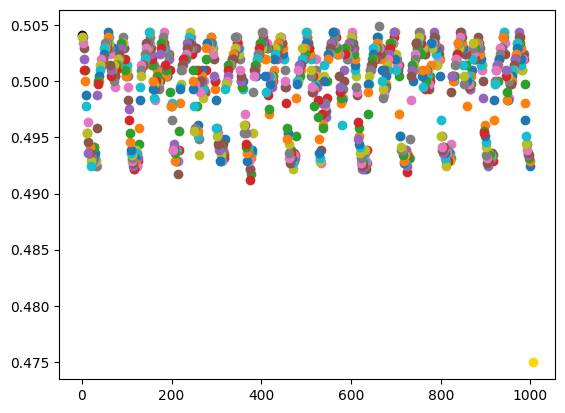

In [51]:
e = 1000

print('grow')

tree = grow(e-3)

print('order')

tree.post_order()

print('draw')

l = tree.state_arr
plt.scatter(0, dnn_model(data[:, -1]), c='black')

for i in range(1, l.shape[0]):
    plt.scatter(l[i][1], l[i][0])

plt.scatter(e+5, dnn_model(goal), c='gold')
plt.show()

In [52]:
model.save_model('./model/powerful_lstm')

AttributeError: 'Model_' object has no attribute 'save_model'